In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taco-sales-dataset-20242025/taco_sales_(2024-2025).csv


# DATA LOADING AND PREPROCESSING

In [2]:
df = pd.read_csv('/kaggle/input/taco-sales-dataset-20242025/taco_sales_(2024-2025).csv')
df

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order
0,770487,El Taco Loco,New York,01-08-2024 14:55,01-08-2024 15:36,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False
1,671858,El Taco Loco,San Antonio,23-11-2024 17:11,23-11-2024 17:25,14,Regular,Beef Taco,1,6.20,4.25,3.01,True
2,688508,Taco Haven,Austin,21-11-2024 20:24,21-11-2024 21:02,38,Large,Pork Taco,2,20.33,7.00,0.02,False
3,944962,Spicy Taco House,Dallas,21-09-2024 06:43,21-09-2024 07:28,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True
4,476417,Casa del Taco,San Antonio,24-07-2024 11:01,24-07-2024 11:16,15,Large,Pork Taco,0,24.34,4.50,1.14,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,164891,La Vida Taco,Austin,27-05-2024 11:12,27-05-2024 12:11,59,Large,Veggie Taco,2,20.04,7.00,2.80,False
996,232442,The Taco Stand,San Antonio,03-04-2025 20:51,03-04-2025 21:29,38,Regular,Fish Taco,0,13.69,3.00,1.38,False
997,251729,Urban Tacos,Houston,23-01-2025 05:33,23-01-2025 06:41,68,Regular,Pork Taco,2,4.07,5.50,2.00,False
998,940215,Taco Fiesta,San Antonio,05-09-2024 15:49,05-09-2024 16:38,49,Regular,Veggie Taco,5,14.56,9.25,1.89,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Order ID                 1000 non-null   int64  
 1   Restaurant Name          1000 non-null   object 
 2   Location                 1000 non-null   object 
 3   Order Time               1000 non-null   object 
 4   Delivery Time            1000 non-null   object 
 5   Delivery Duration (min)  1000 non-null   int64  
 6   Taco Size                1000 non-null   object 
 7   Taco Type                1000 non-null   object 
 8   Toppings Count           1000 non-null   int64  
 9   Distance (km)            1000 non-null   float64
 10  Price ($)                1000 non-null   float64
 11  Tip ($)                  1000 non-null   float64
 12  Weekend Order            1000 non-null   bool   
dtypes: bool(1), float64(3), int64(3), object(6)
memory usage: 94.9+ KB


In [4]:
df.isna().sum()

Order ID                   0
Restaurant Name            0
Location                   0
Order Time                 0
Delivery Time              0
Delivery Duration (min)    0
Taco Size                  0
Taco Type                  0
Toppings Count             0
Distance (km)              0
Price ($)                  0
Tip ($)                    0
Weekend Order              0
dtype: int64

In [5]:
df.describe(include='all')

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order
count,1000.000000,1000,1000,1000,1000,1000.00000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000
unique,NaN,10,10,1000,999,NaN,2,5,NaN,NaN,NaN,NaN,2
top,NaN,Urban Tacos,Chicago,01-08-2024 14:55,15-04-2025 16:06,NaN,Regular,Chicken Taco,NaN,NaN,NaN,NaN,False
freq,NaN,117,116,1,2,NaN,502,218,NaN,NaN,NaN,NaN,725
mean,552504.865000,NaN,NaN,NaN,NaN,50.93000,NaN,NaN,2.529000,13.073420,6.908250,1.806110,NaN
std,255948.779709,NaN,NaN,NaN,NaN,23.22754,NaN,NaN,1.717005,7.142268,2.310137,1.132035,NaN
min,101139.000000,NaN,NaN,NaN,NaN,10.00000,NaN,NaN,0.000000,0.510000,3.000000,0.010000,NaN
25%,331796.750000,NaN,NaN,NaN,NaN,30.00000,NaN,NaN,1.000000,6.972500,4.500000,0.907500,NaN
50%,559740.000000,NaN,NaN,NaN,NaN,53.00000,NaN,NaN,3.000000,13.200000,6.750000,1.760000,NaN
75%,771781.750000,NaN,NaN,NaN,NaN,71.00000,NaN,NaN,4.000000,19.242500,9.250000,2.520000,NaN


# VIZUALIZAION SECTION

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
sns.set_style('whitegrid')

In [8]:
cols = ['Order ID', 'Restaurant Name', 'Location', 'Order Time',
       'Delivery Time', 'Delivery Duration (min)', 'Taco Size', 'Taco Type',
       'Toppings Count', 'Distance (km)', 'Price ($)', 'Tip ($)',
       'Weekend Order']

# COUNT PLOT

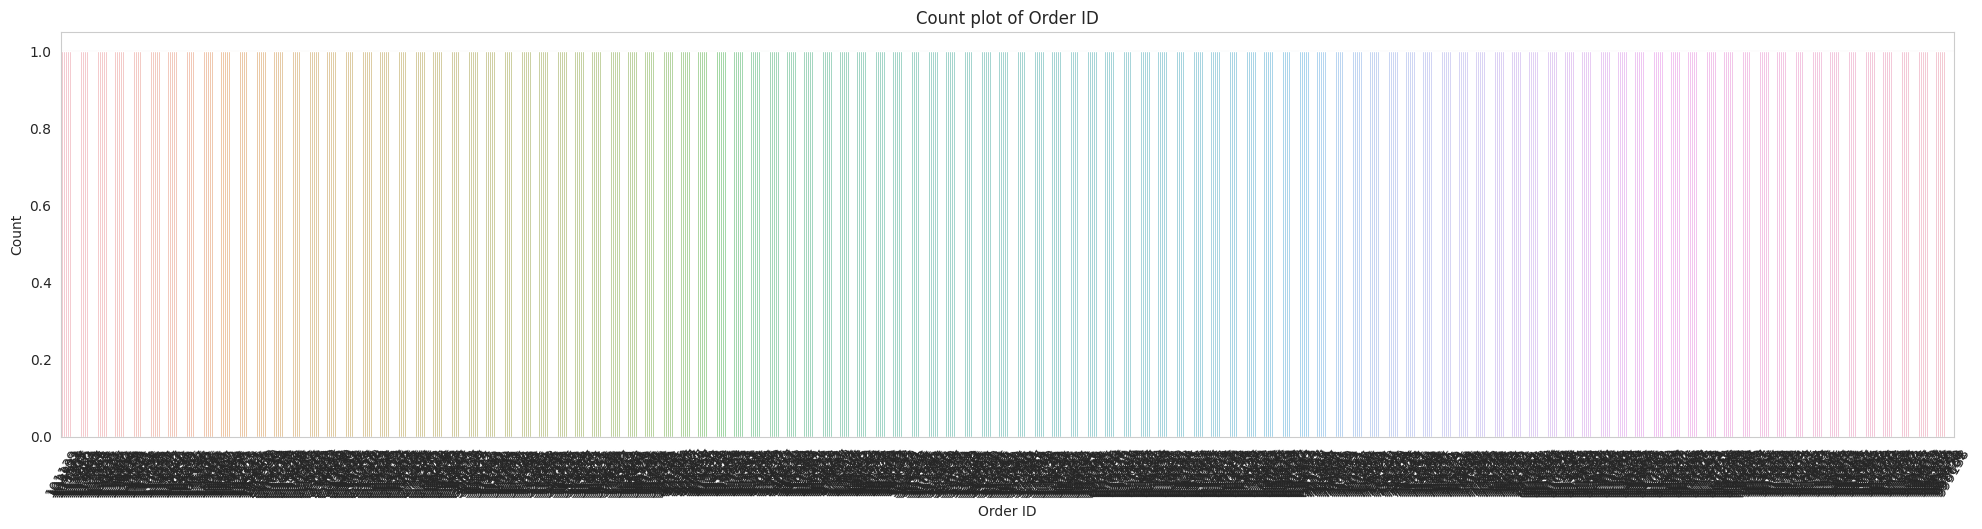

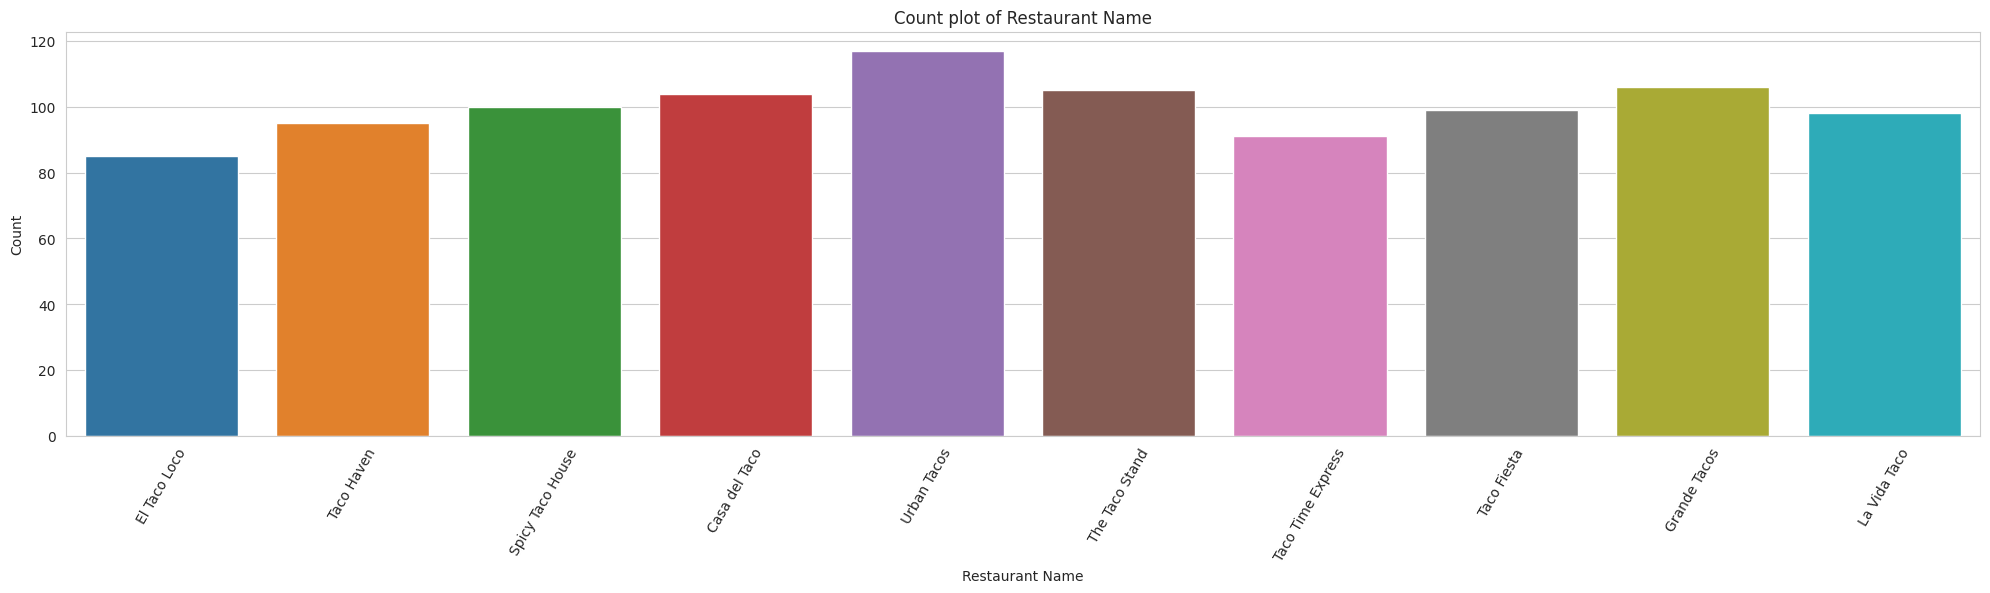

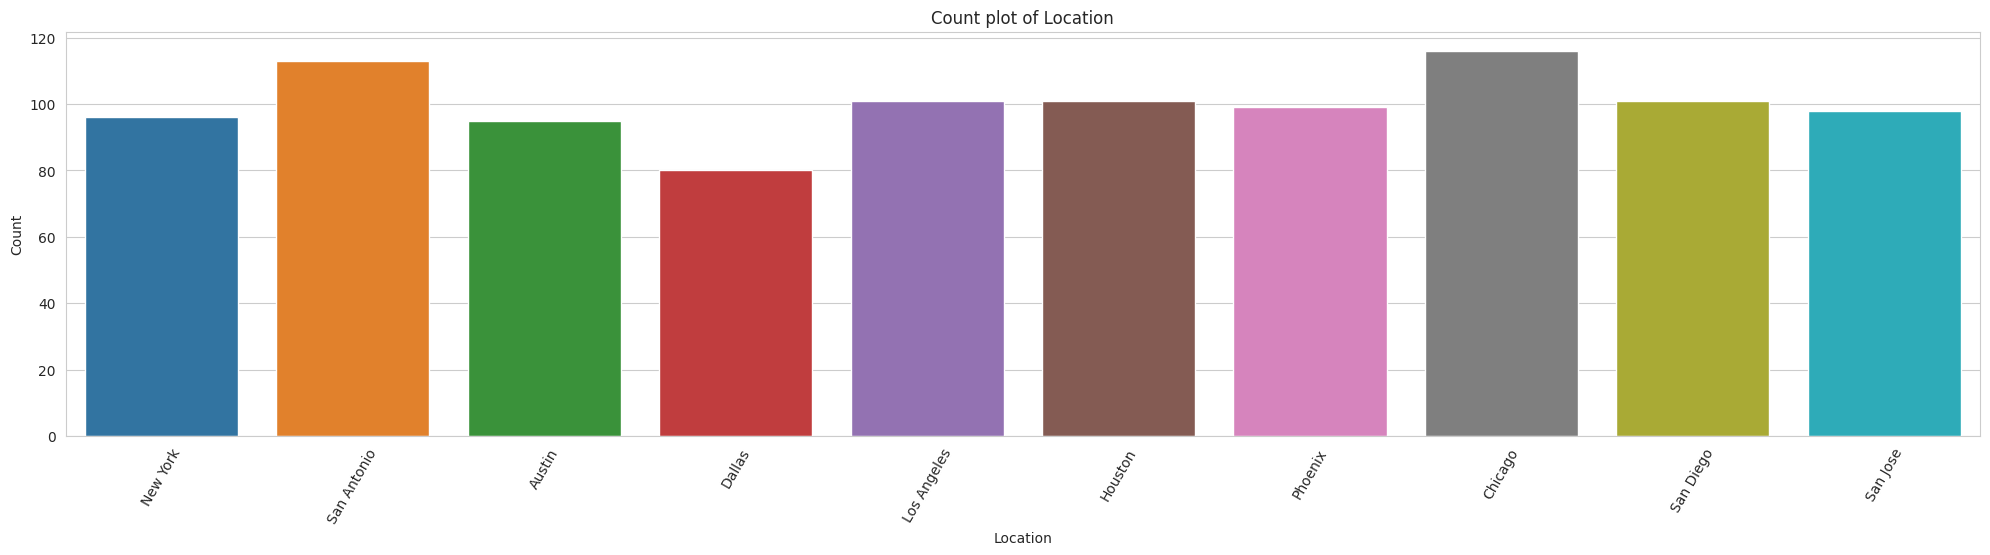

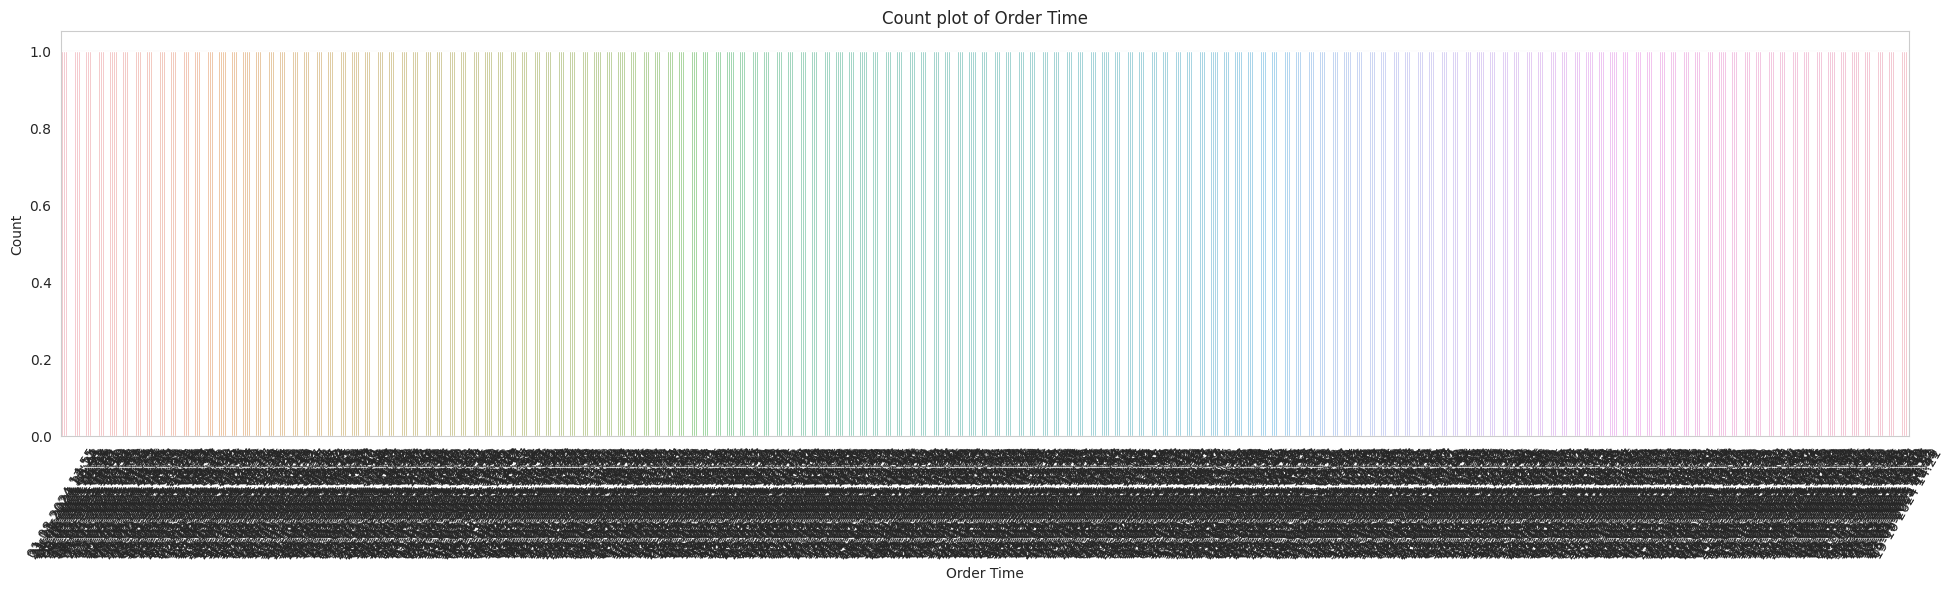

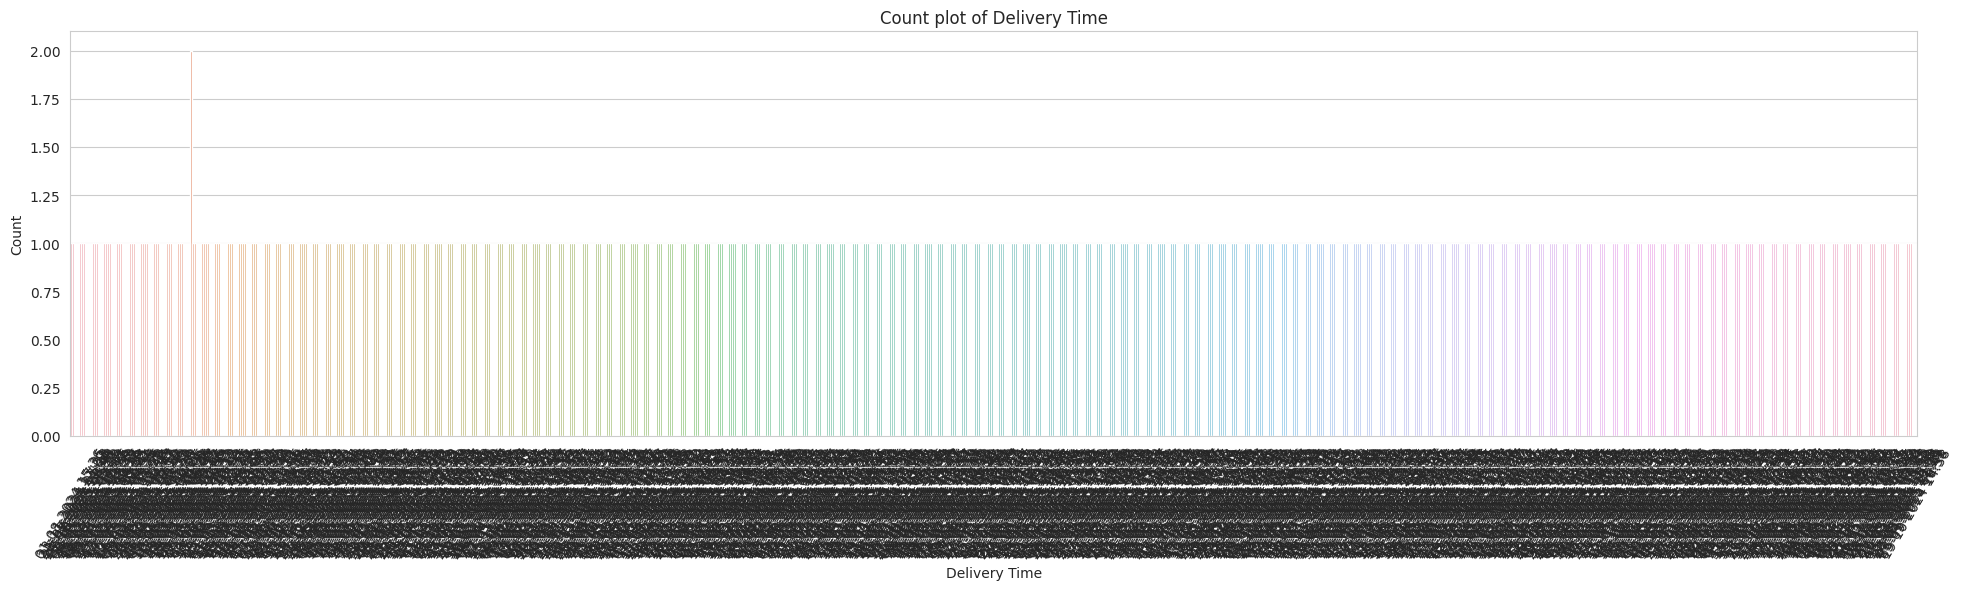

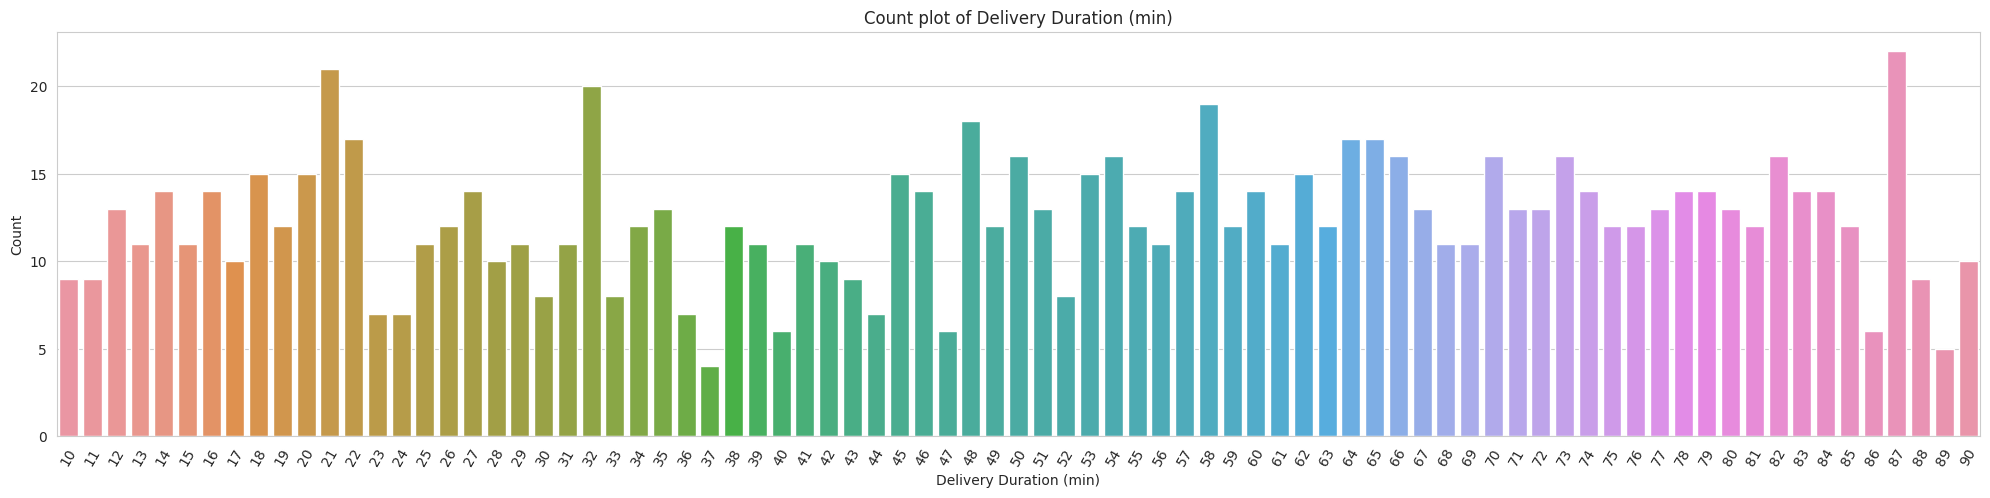

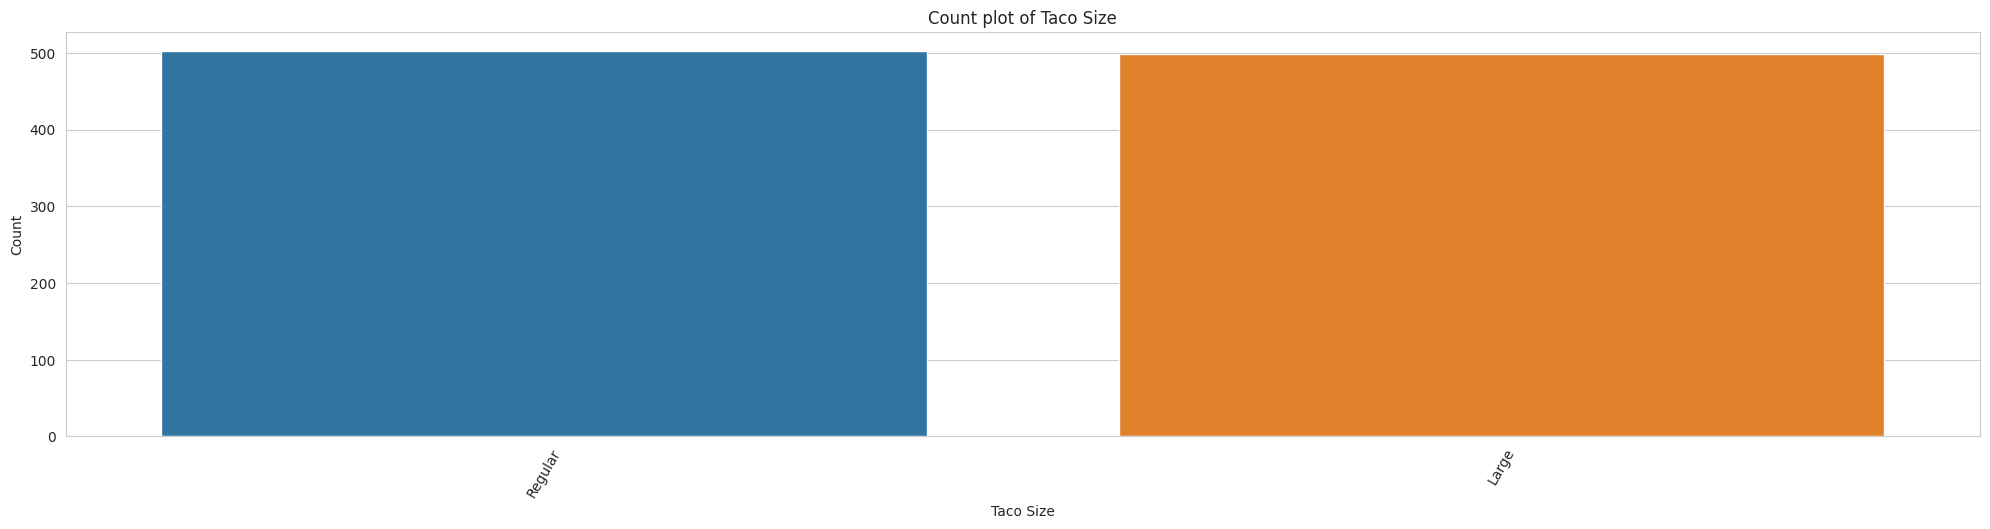

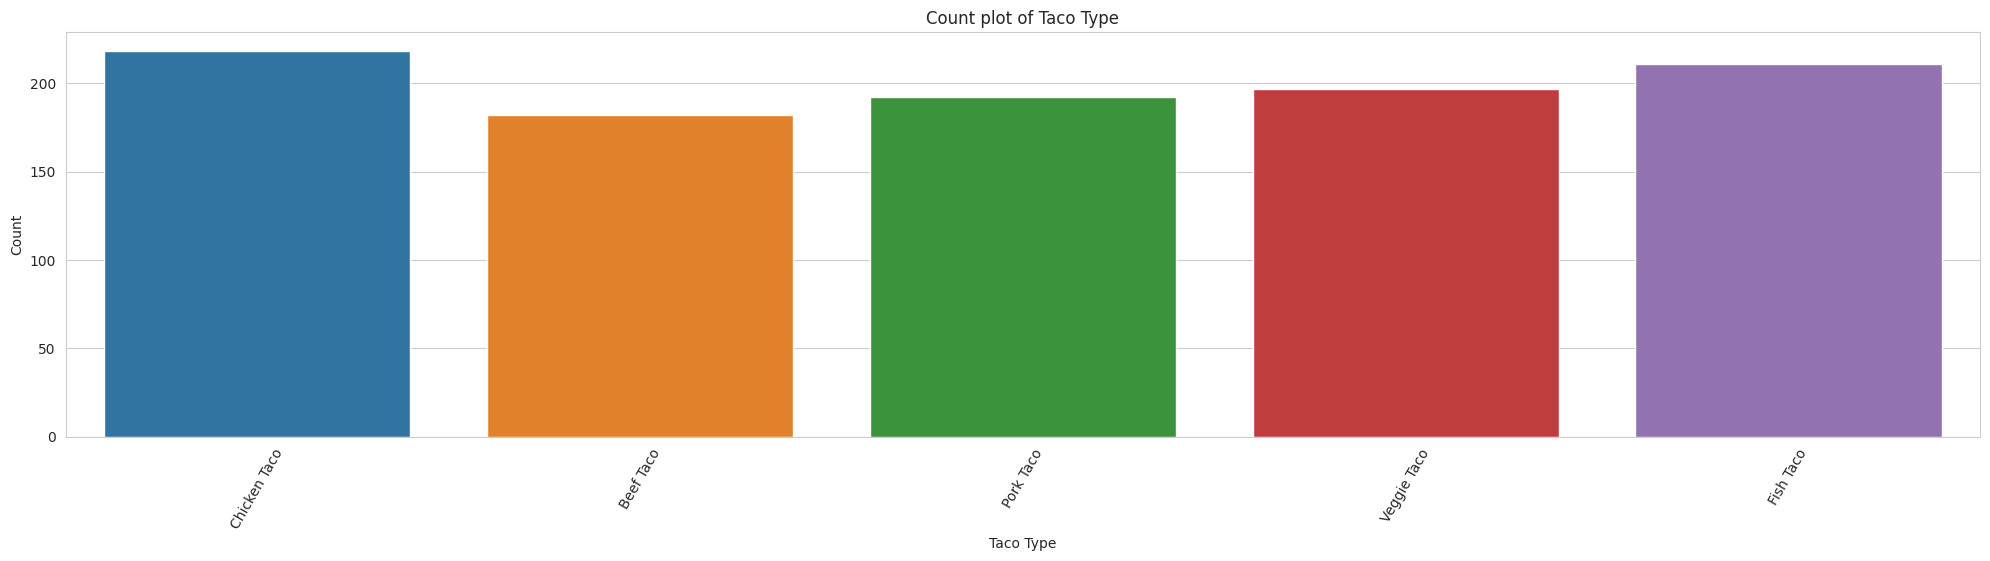

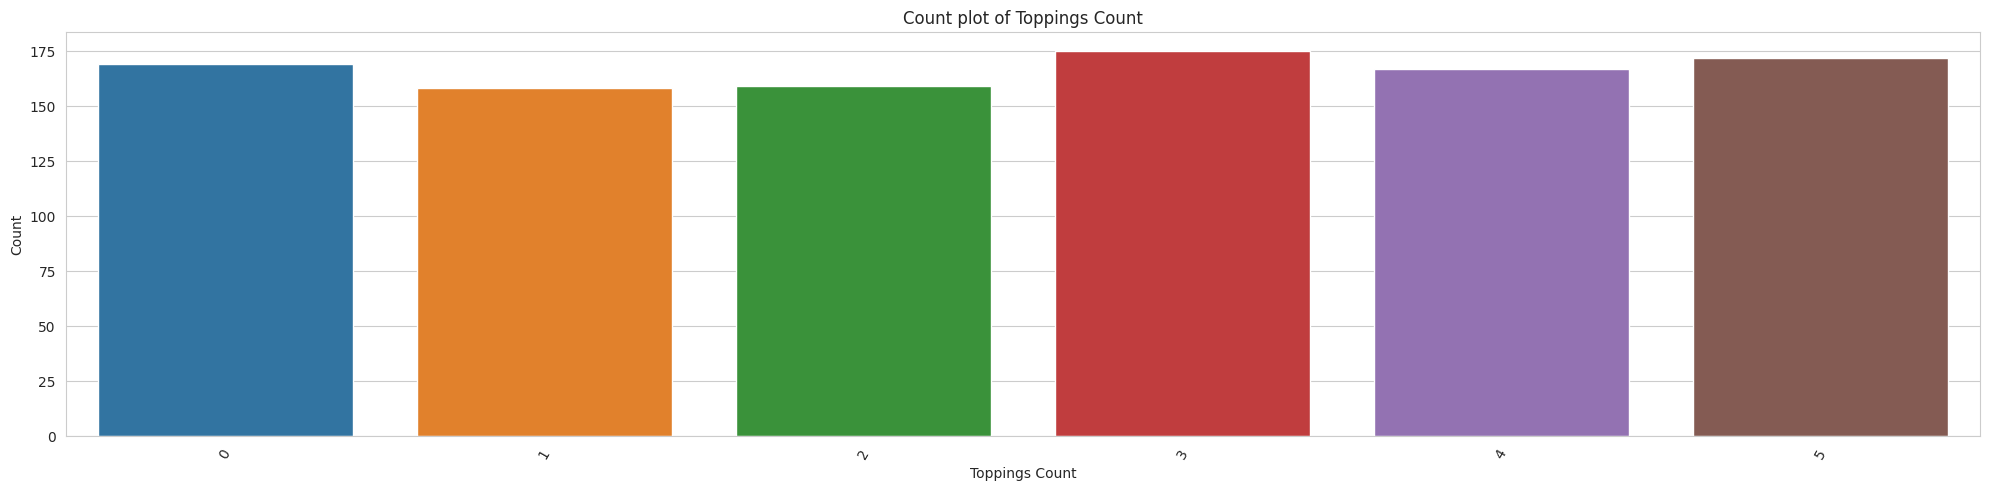

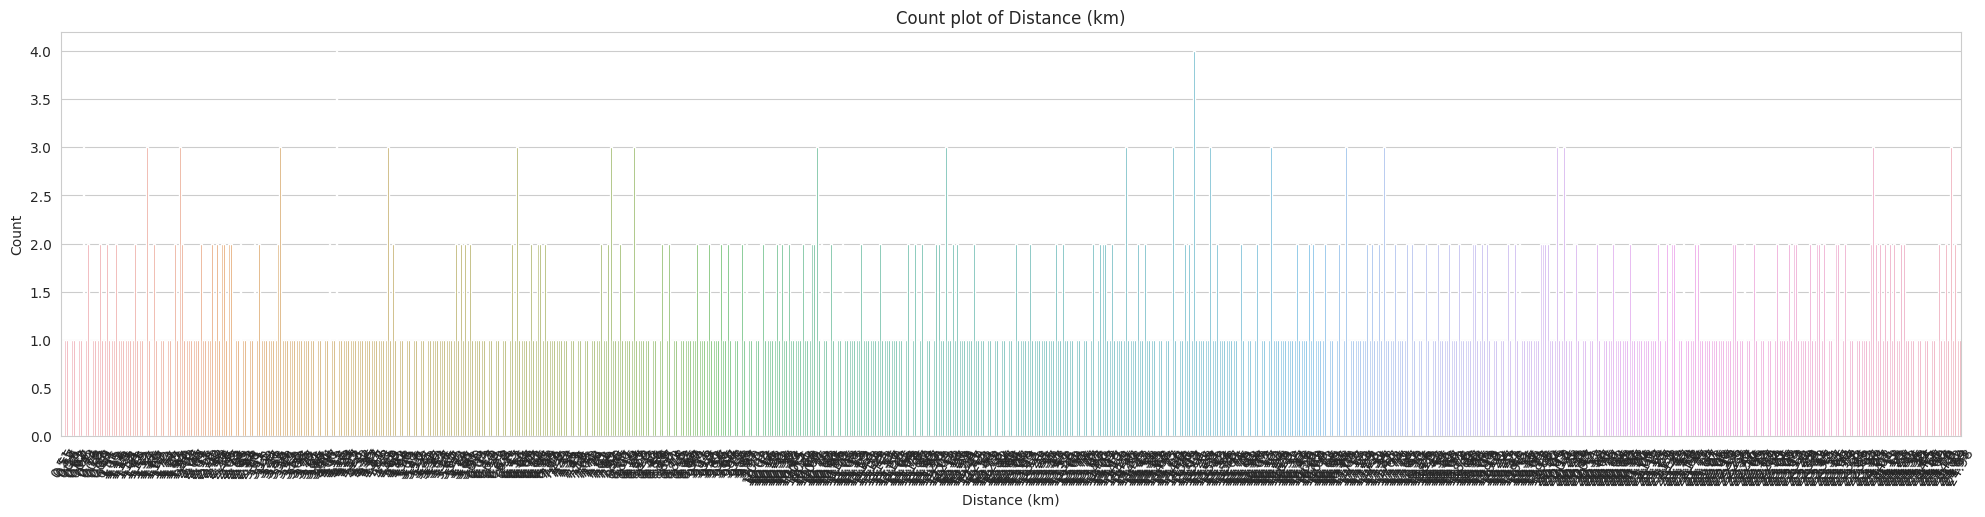

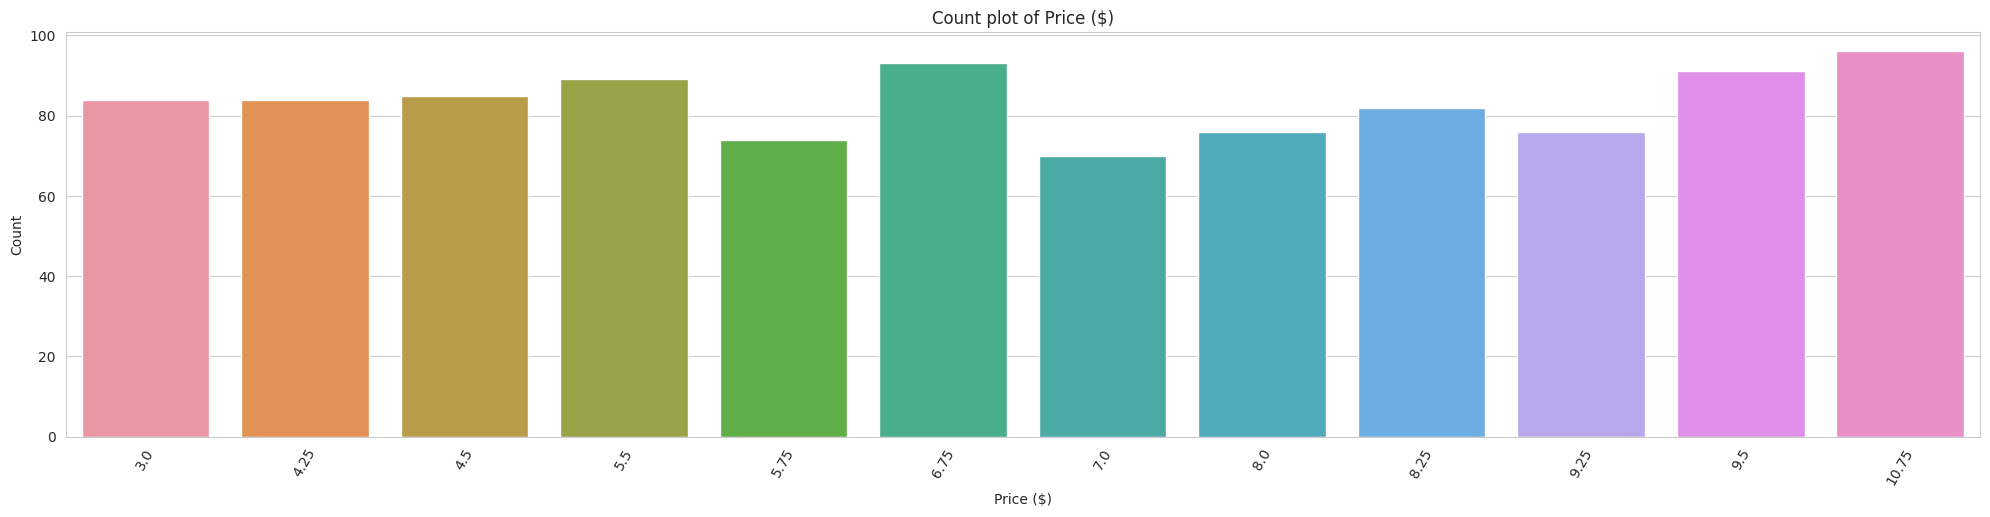

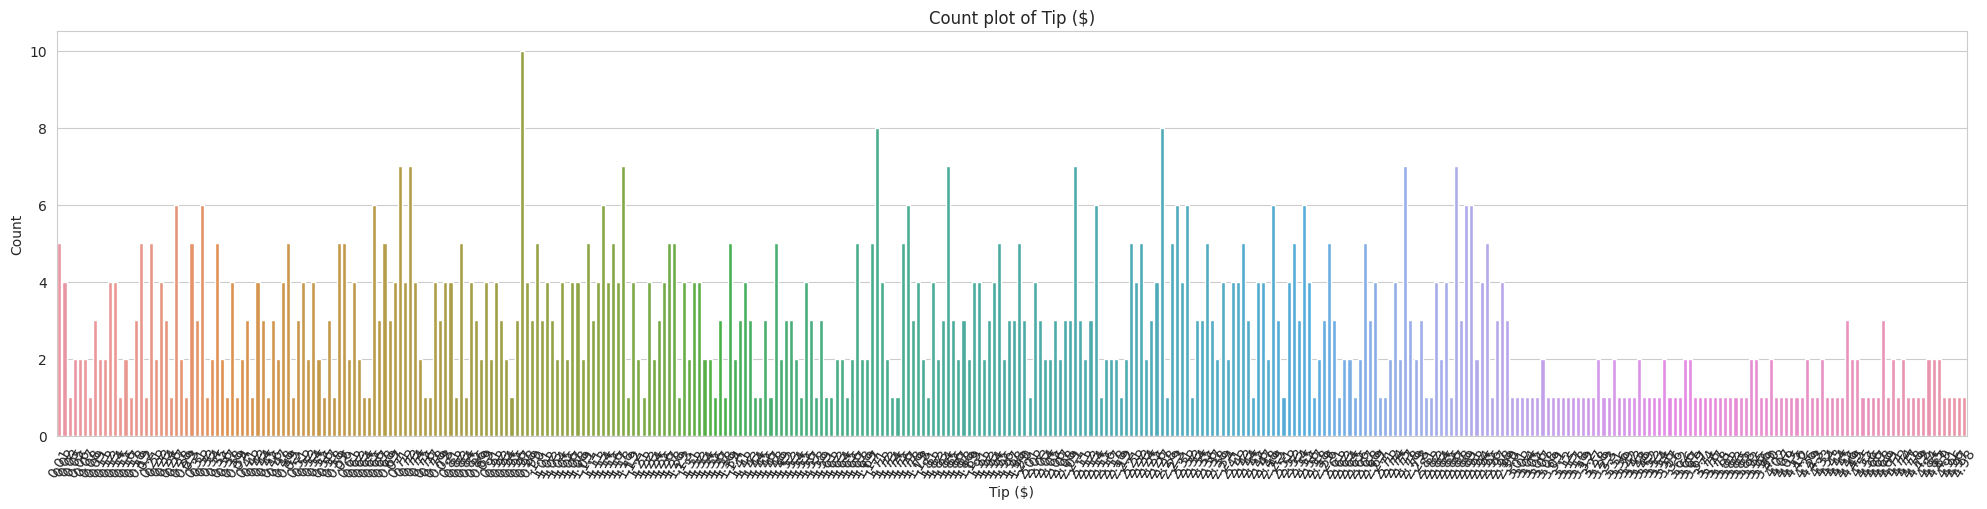

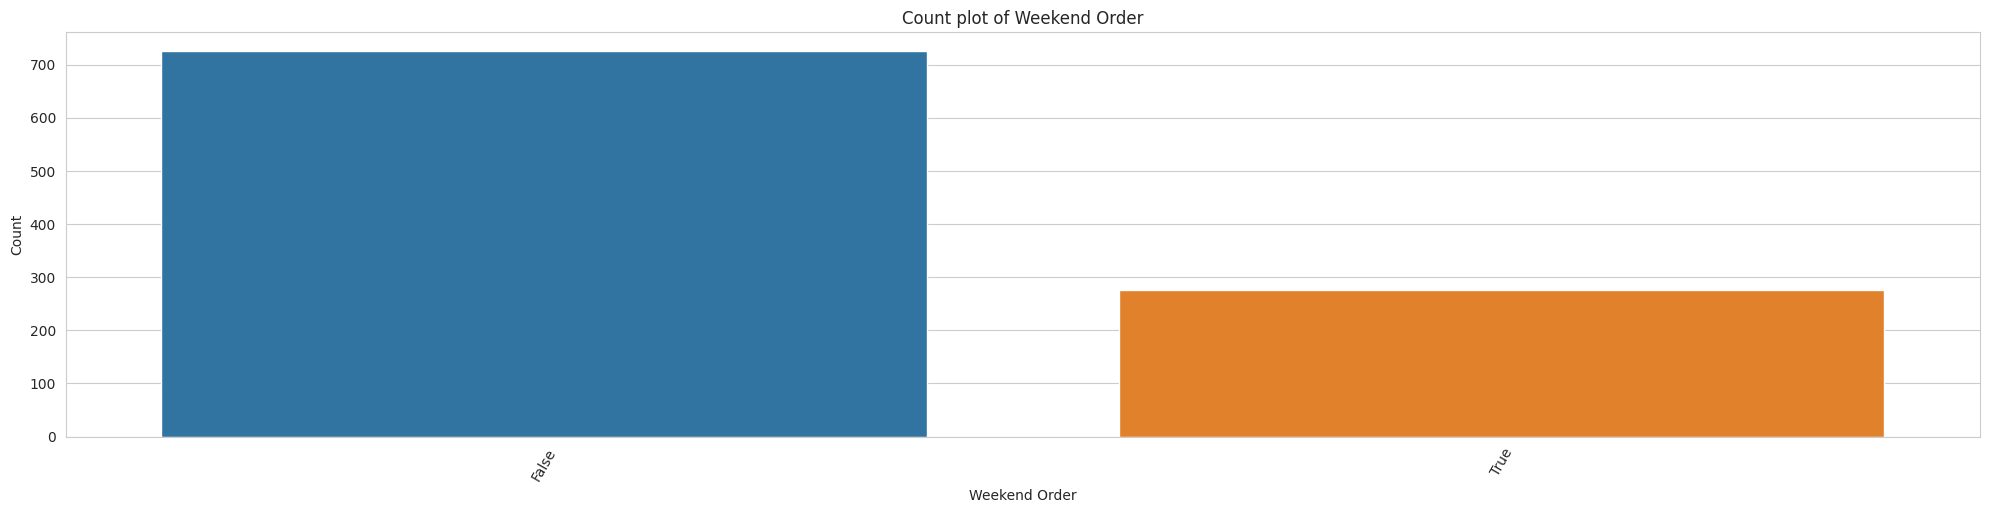

In [9]:
for features in cols:
    if features in df.columns:
        plt.figure(figsize=(20,5))
        sns.countplot(x=features,data=df)
        plt.title(f'Count plot of {features}')
        plt.xlabel(features)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.xticks(rotation=60)
        plt.show()

# HISTOGRAM PLOT

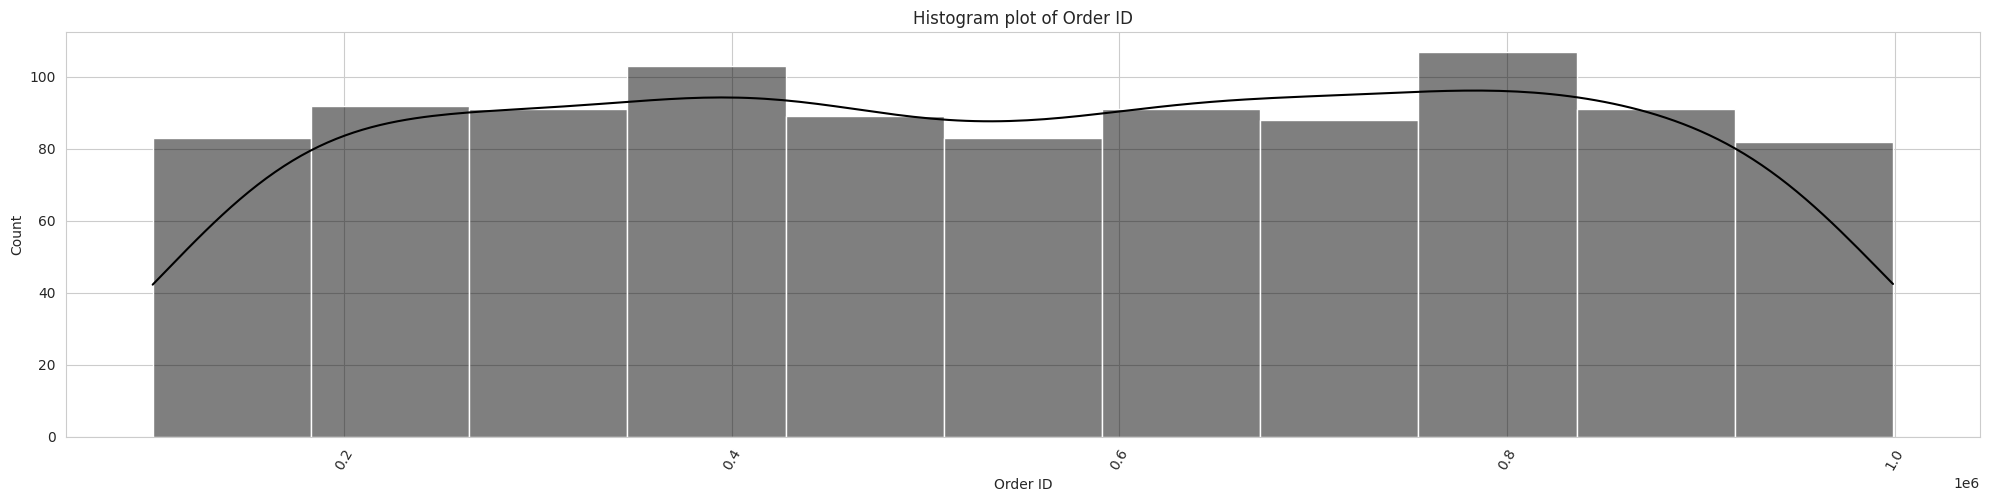

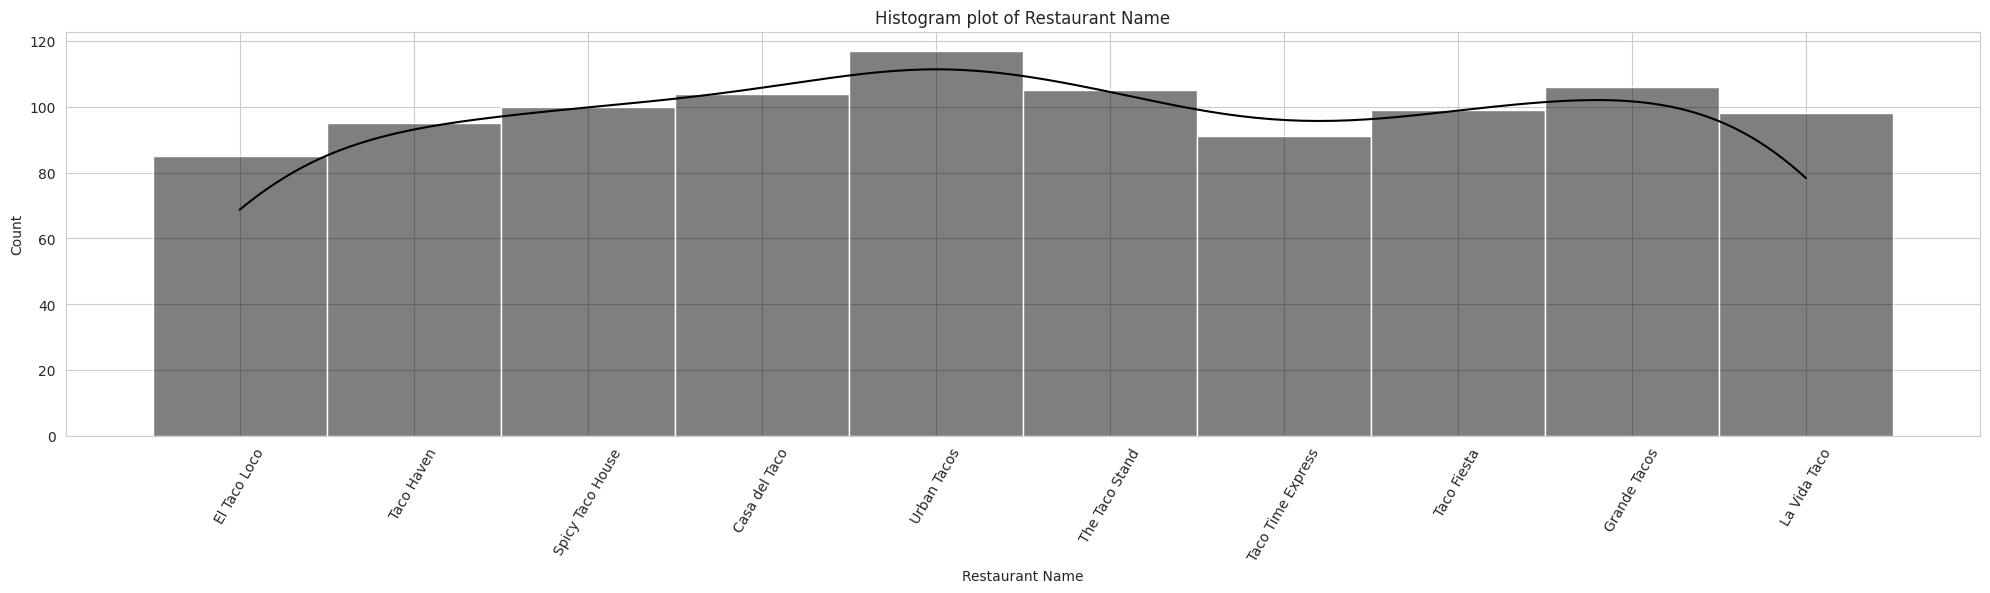

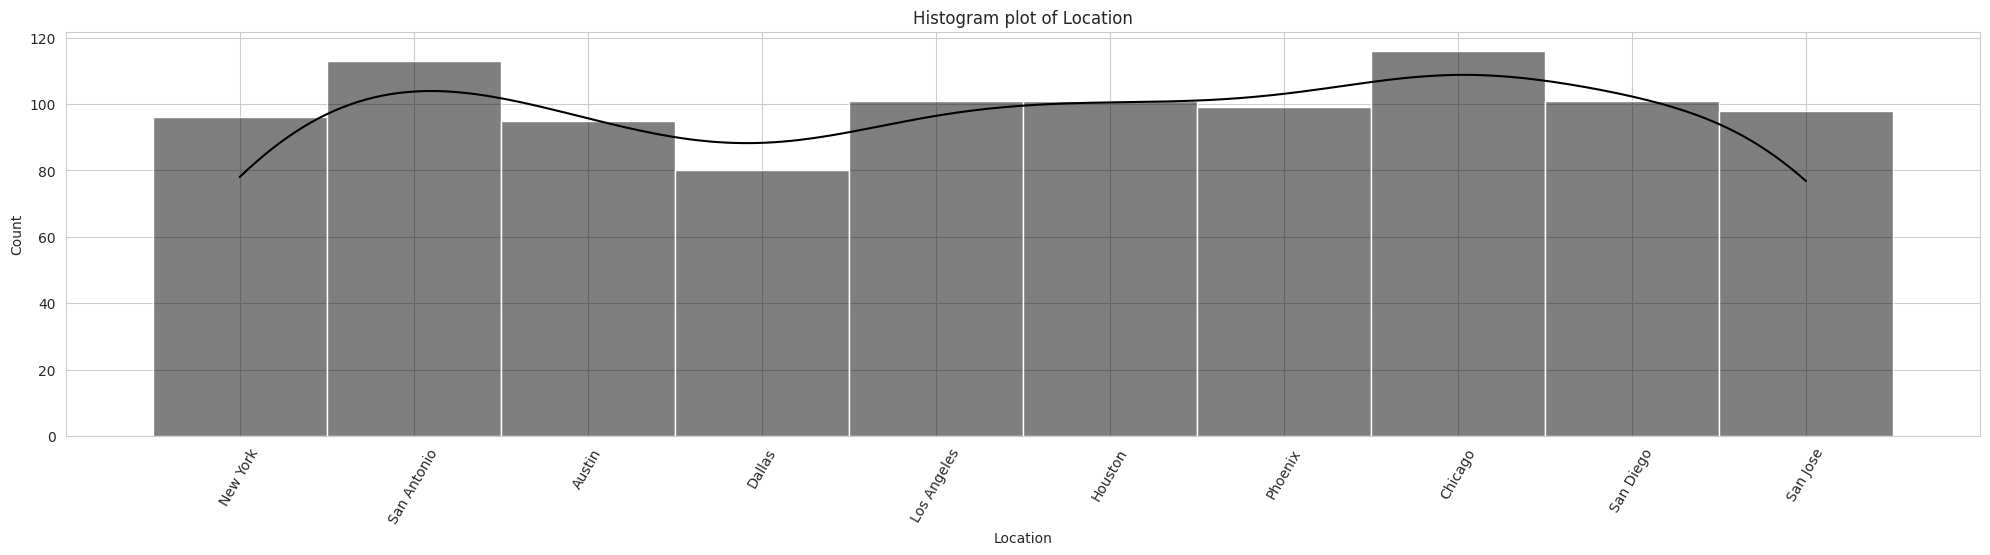

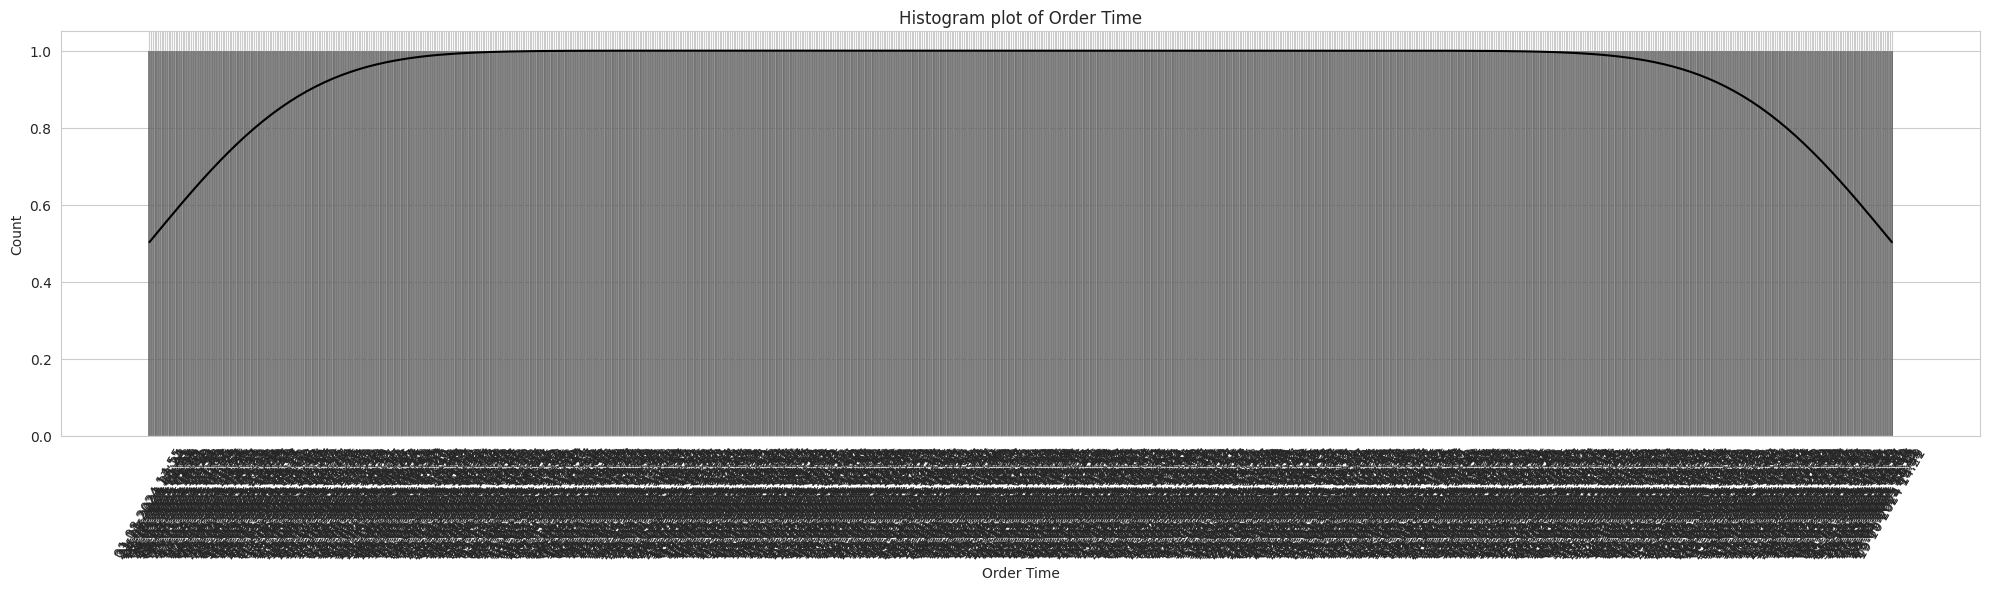

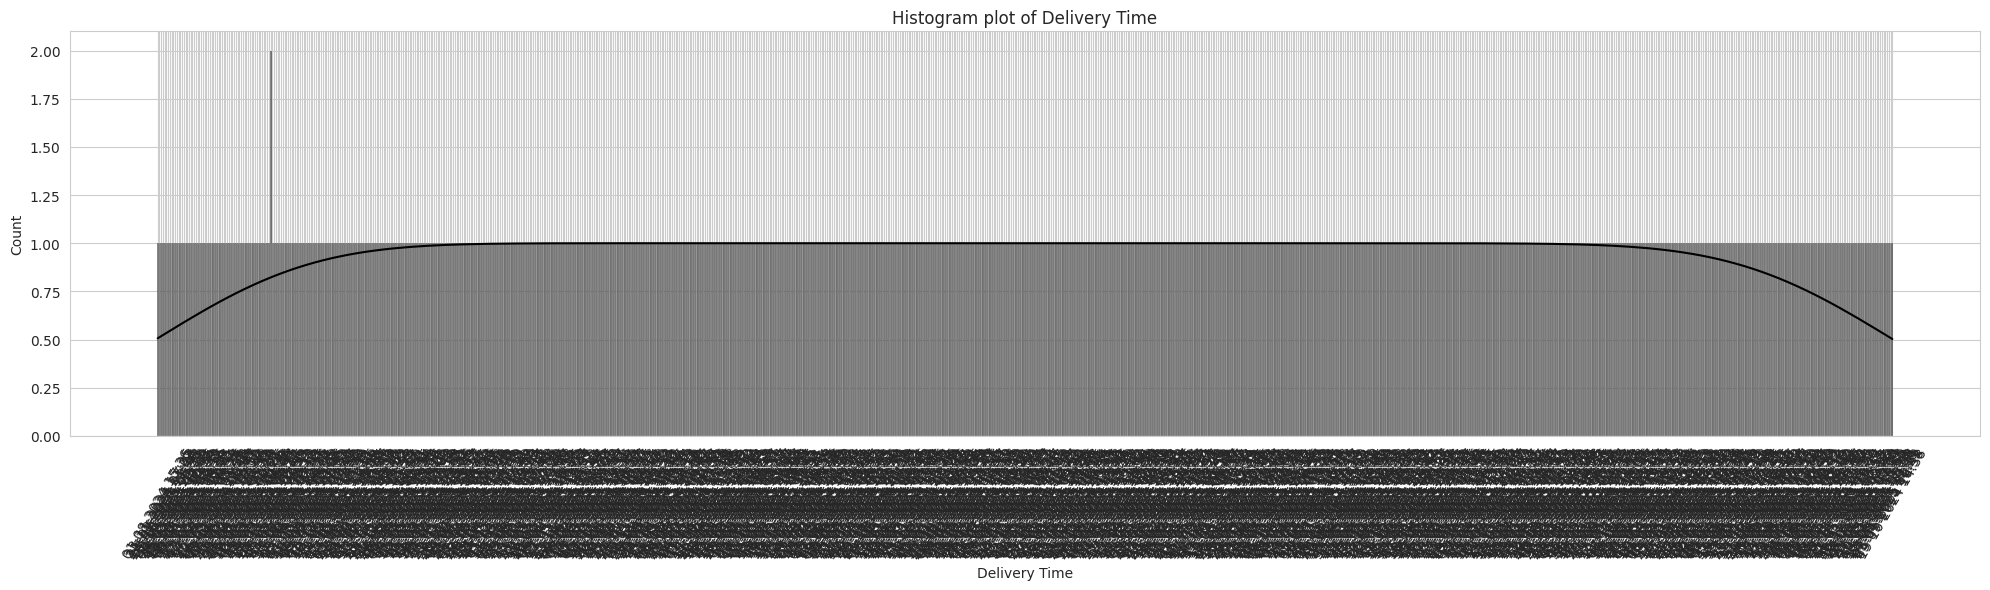

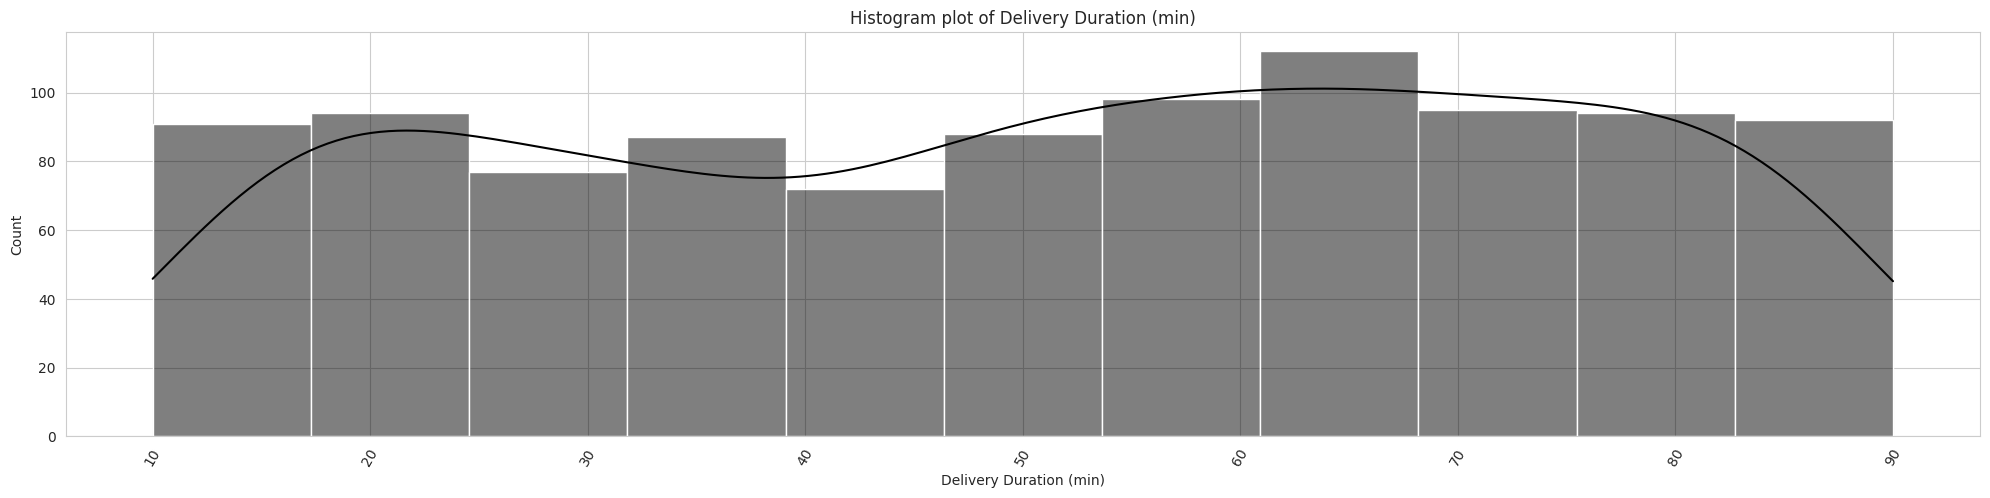

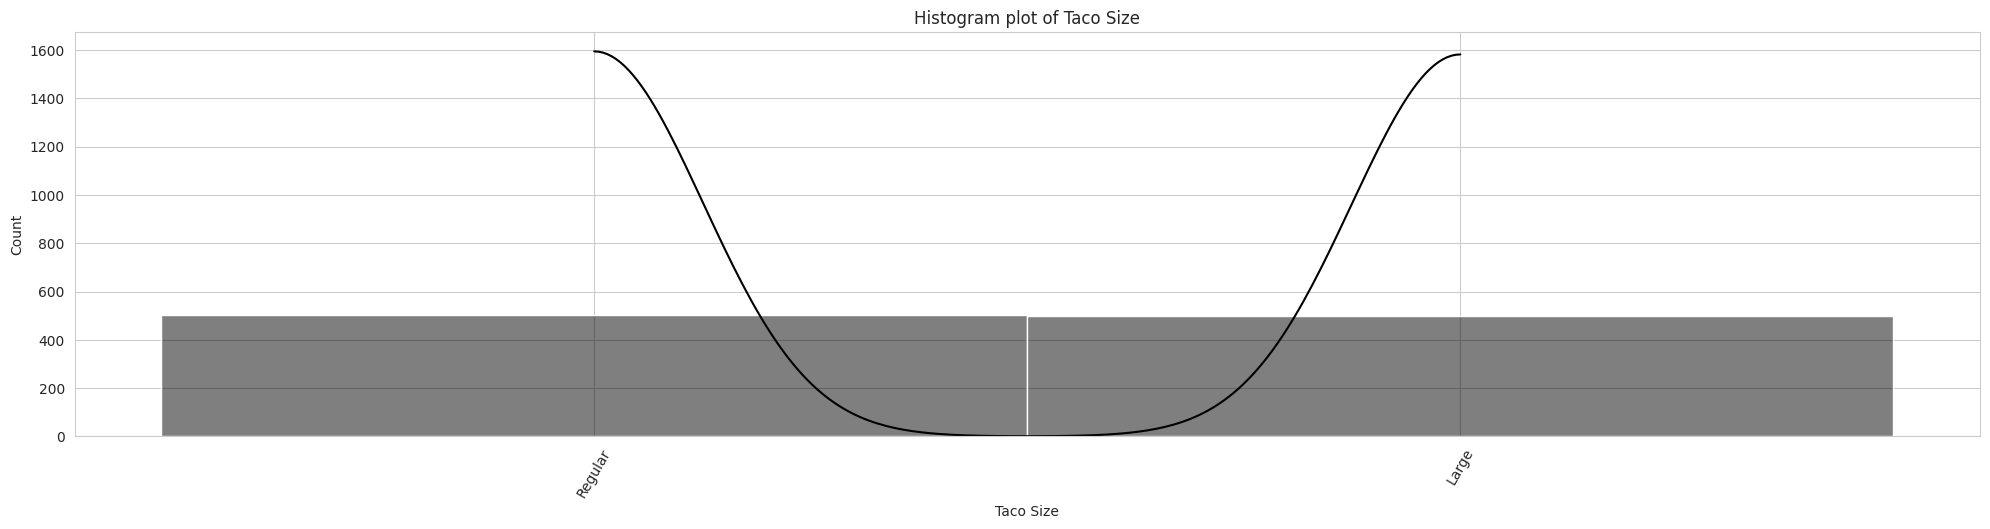

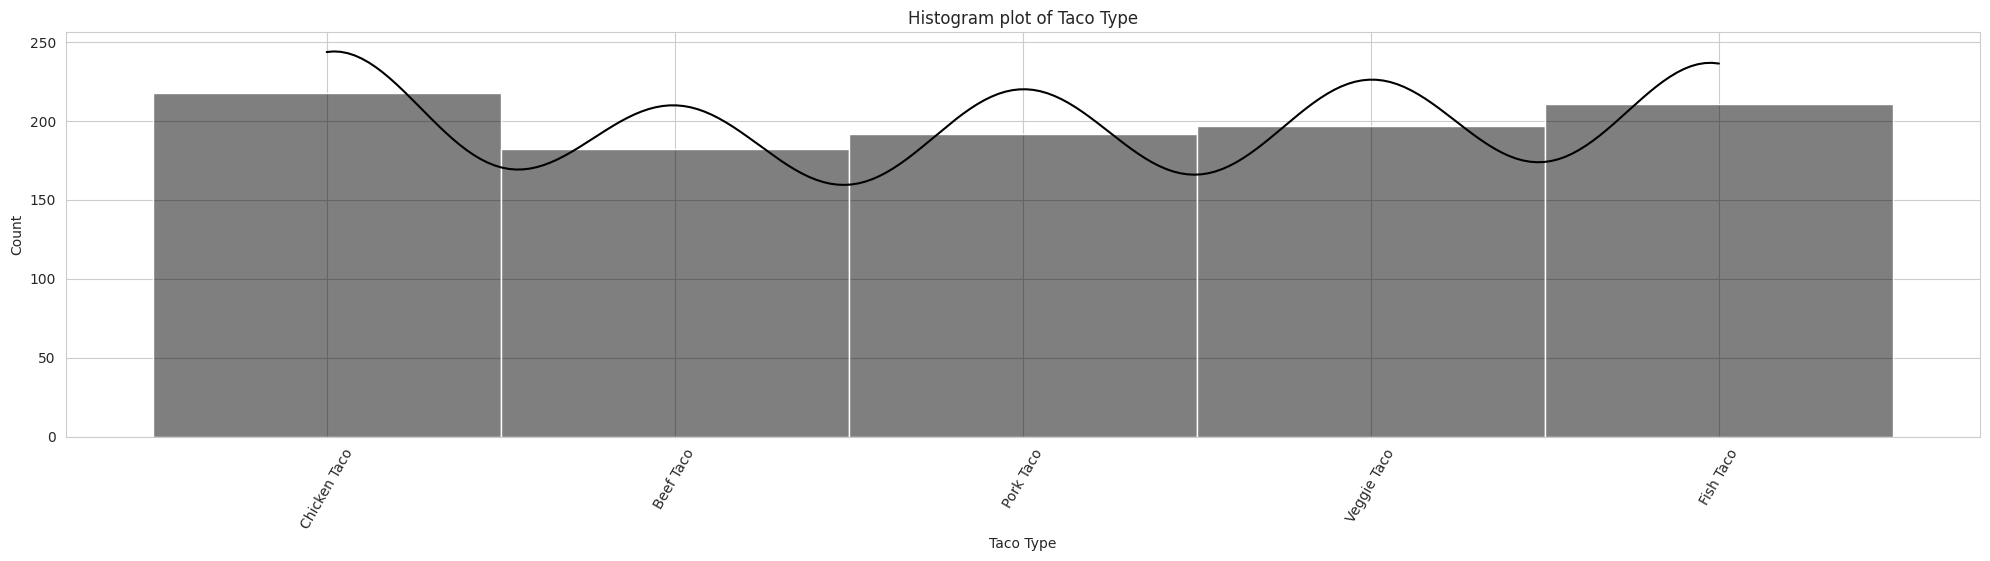

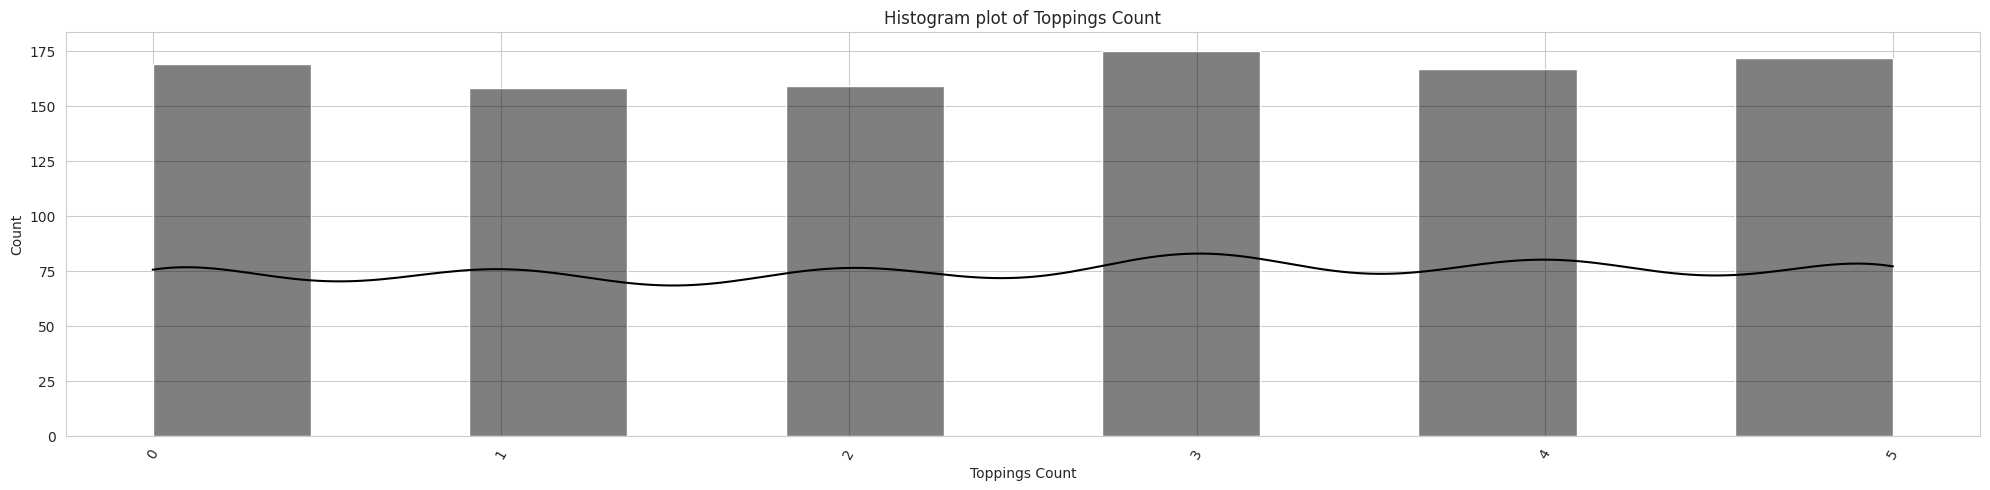

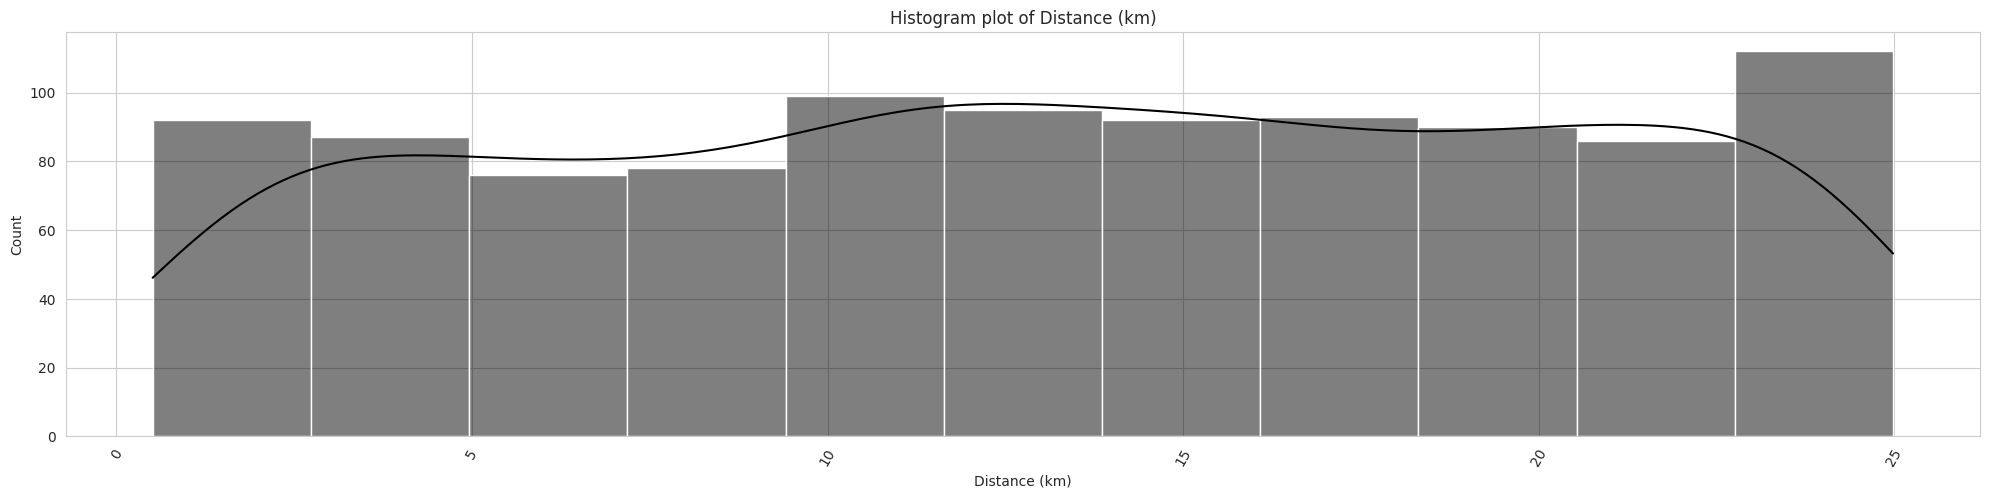

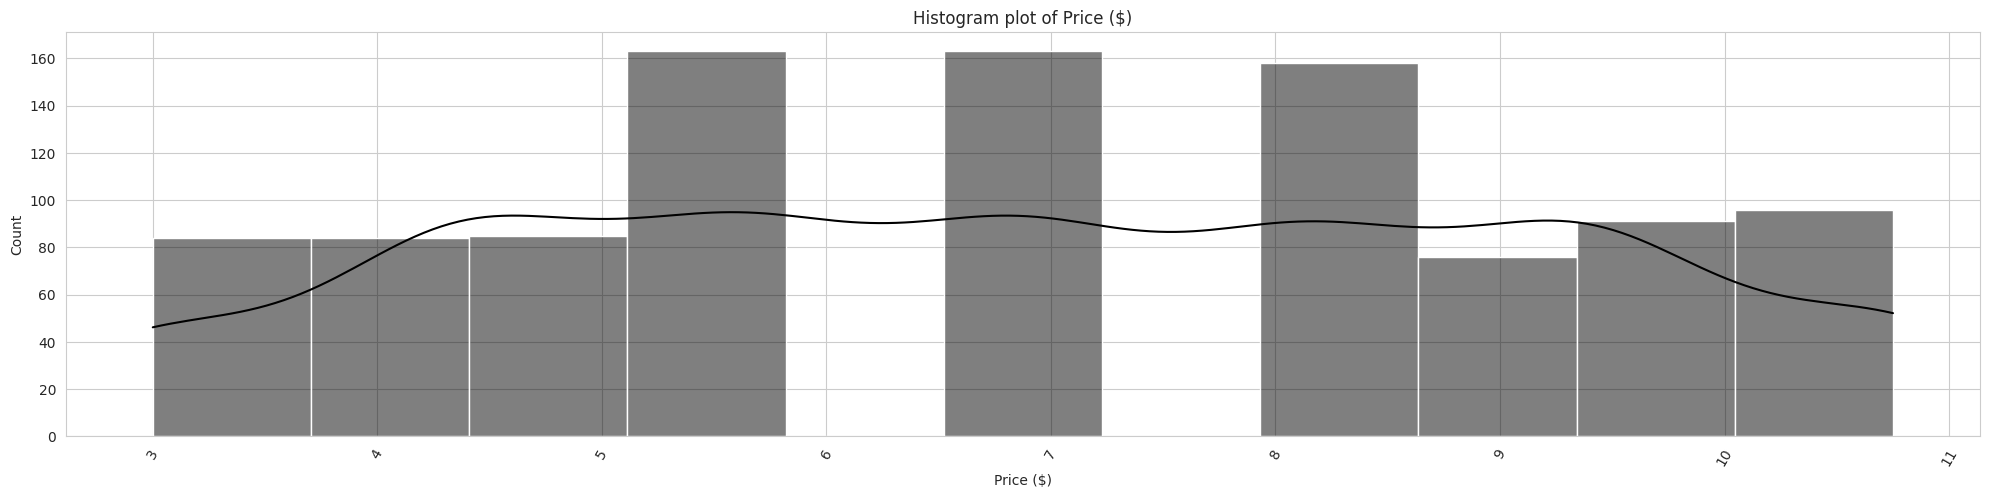

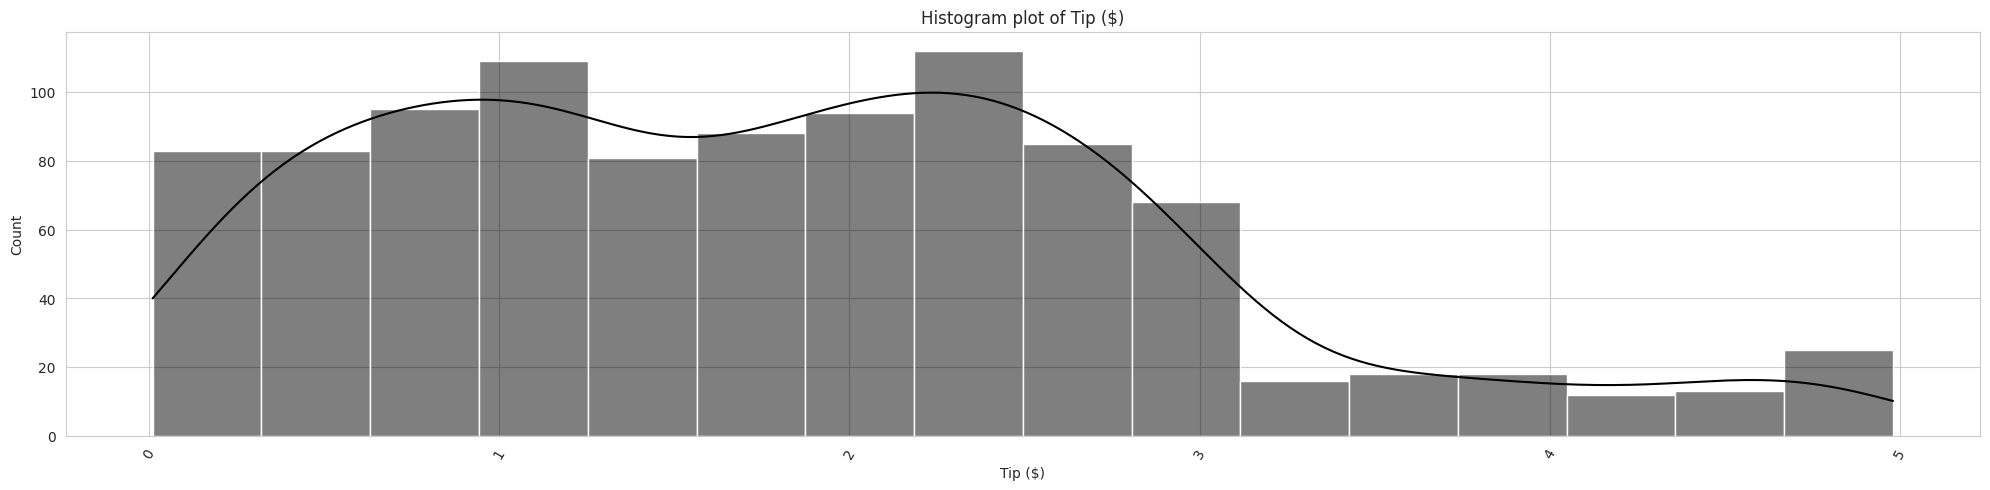

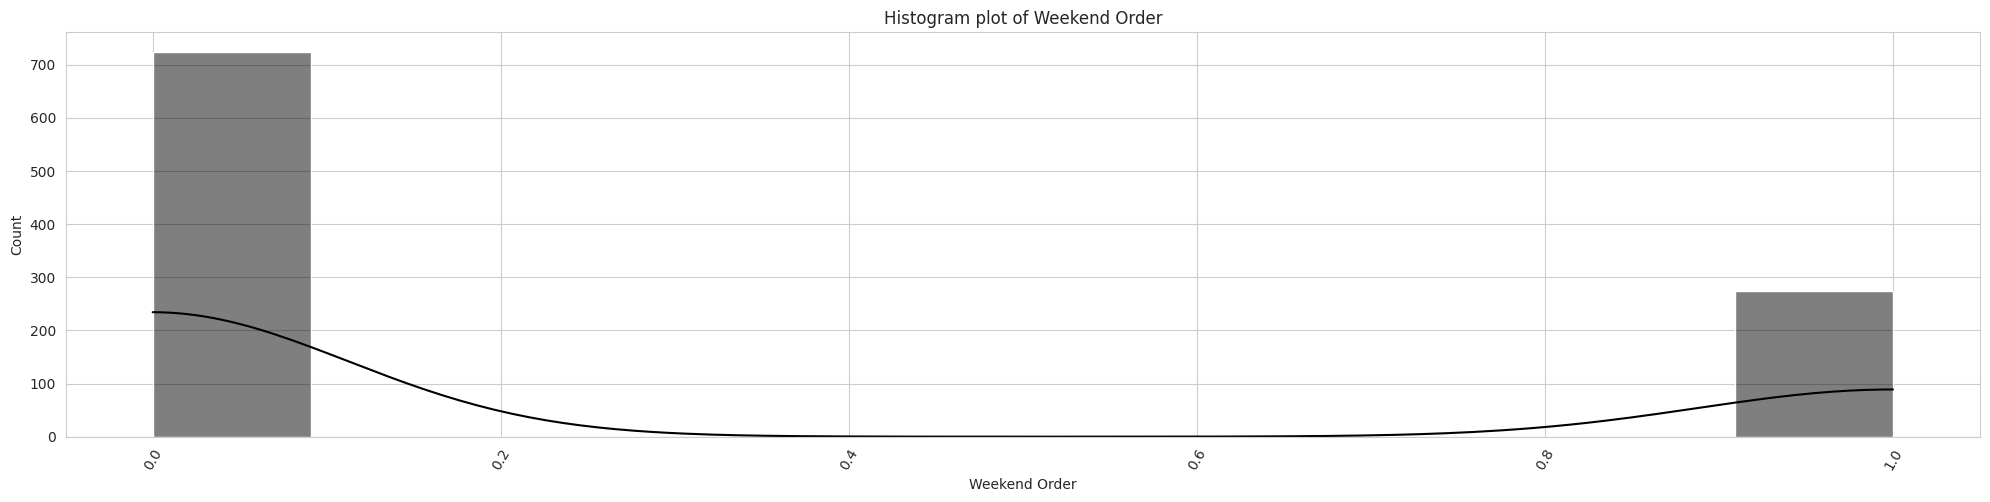

In [10]:
for features in cols:
    if features in df.columns:
        plt.figure(figsize=(20,5))
        sns.histplot(df[features].dropna(),kde = True,color='black')
        plt.title(f'Histogram plot of {features}')
        plt.xlabel(features)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.xticks(rotation=60)
        plt.show()

# KDE PLOT

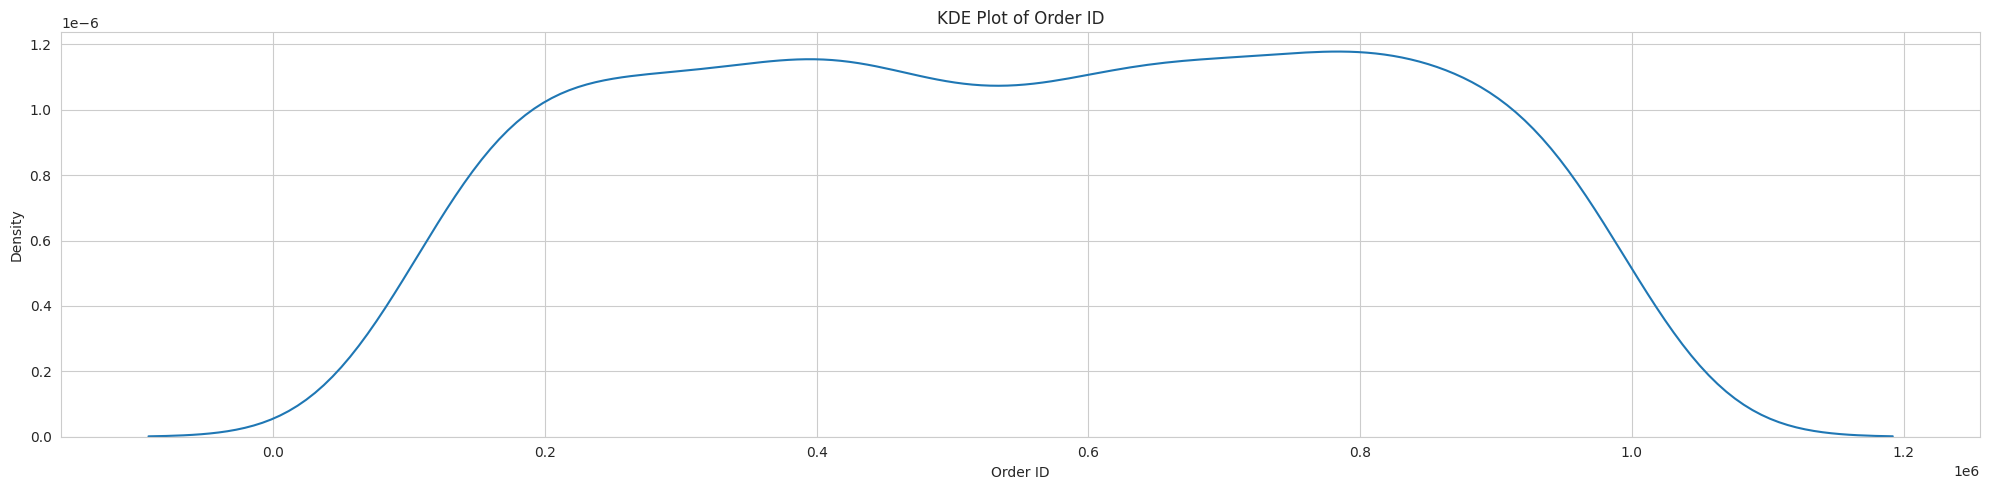

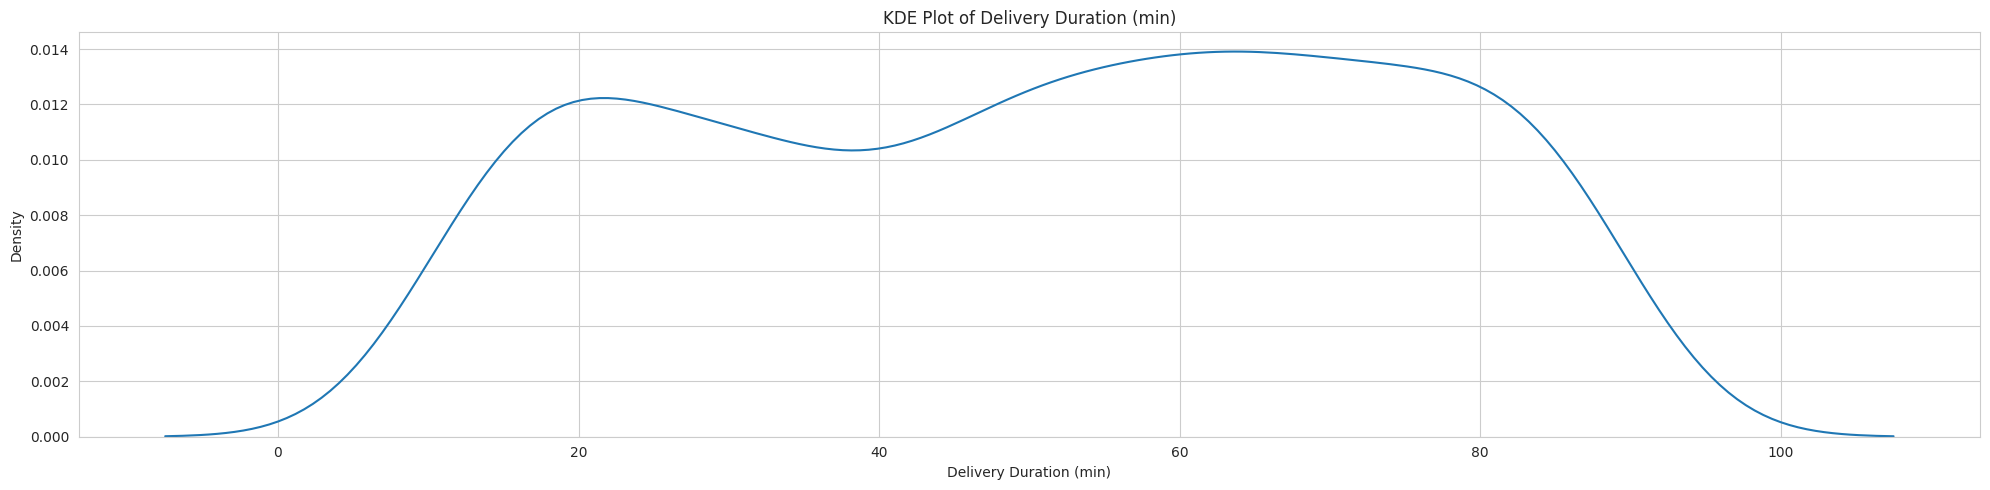

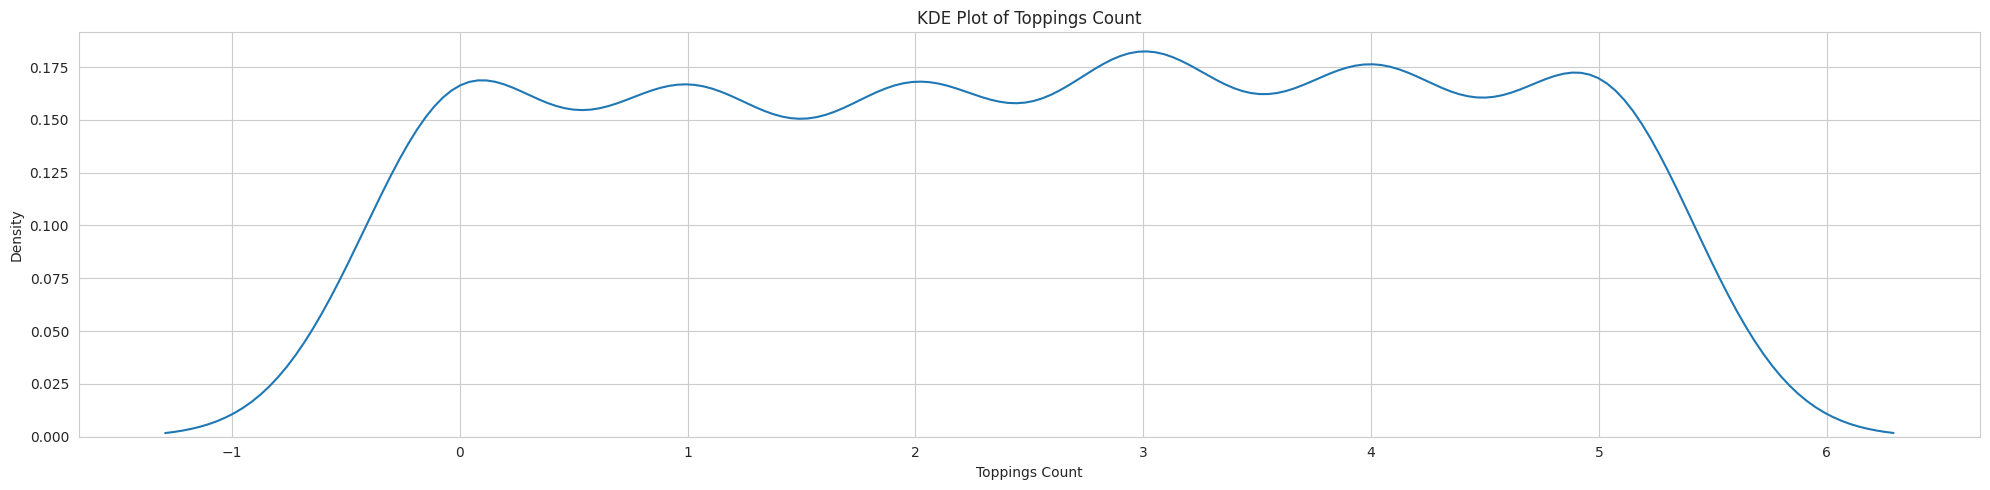

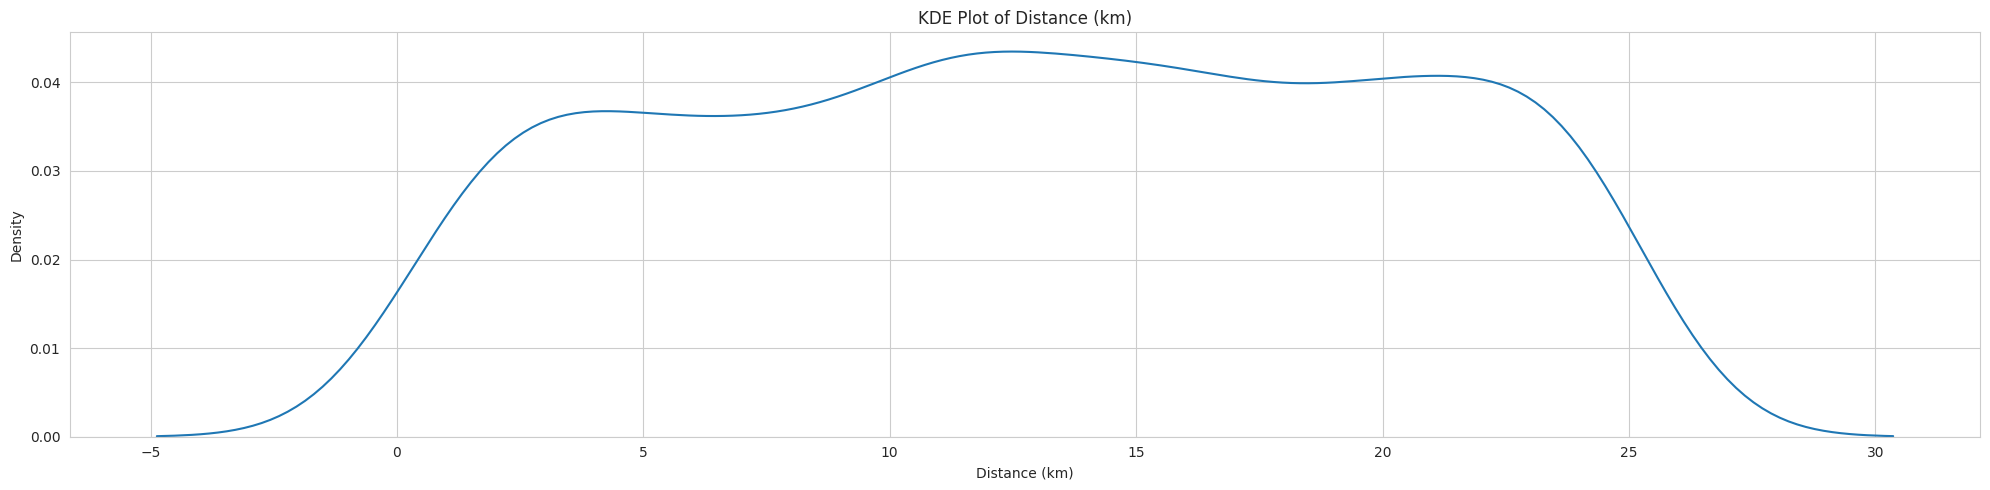

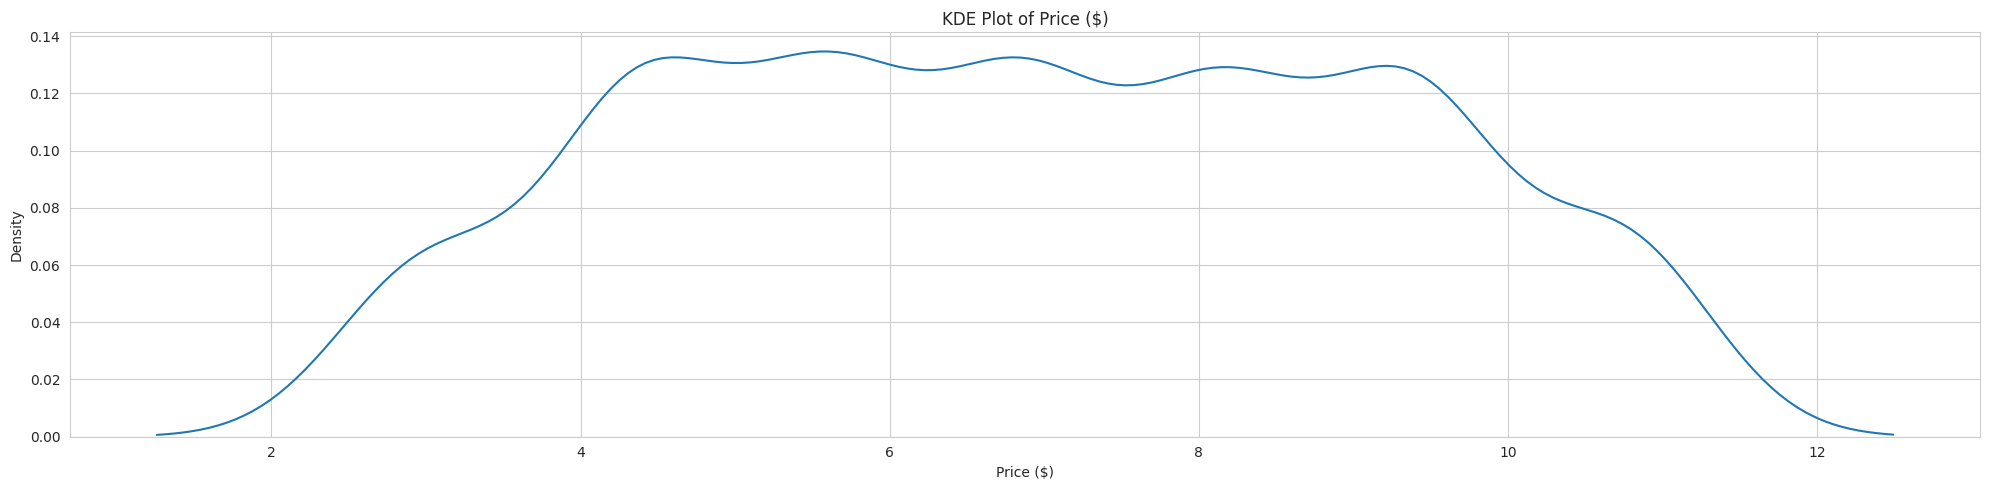

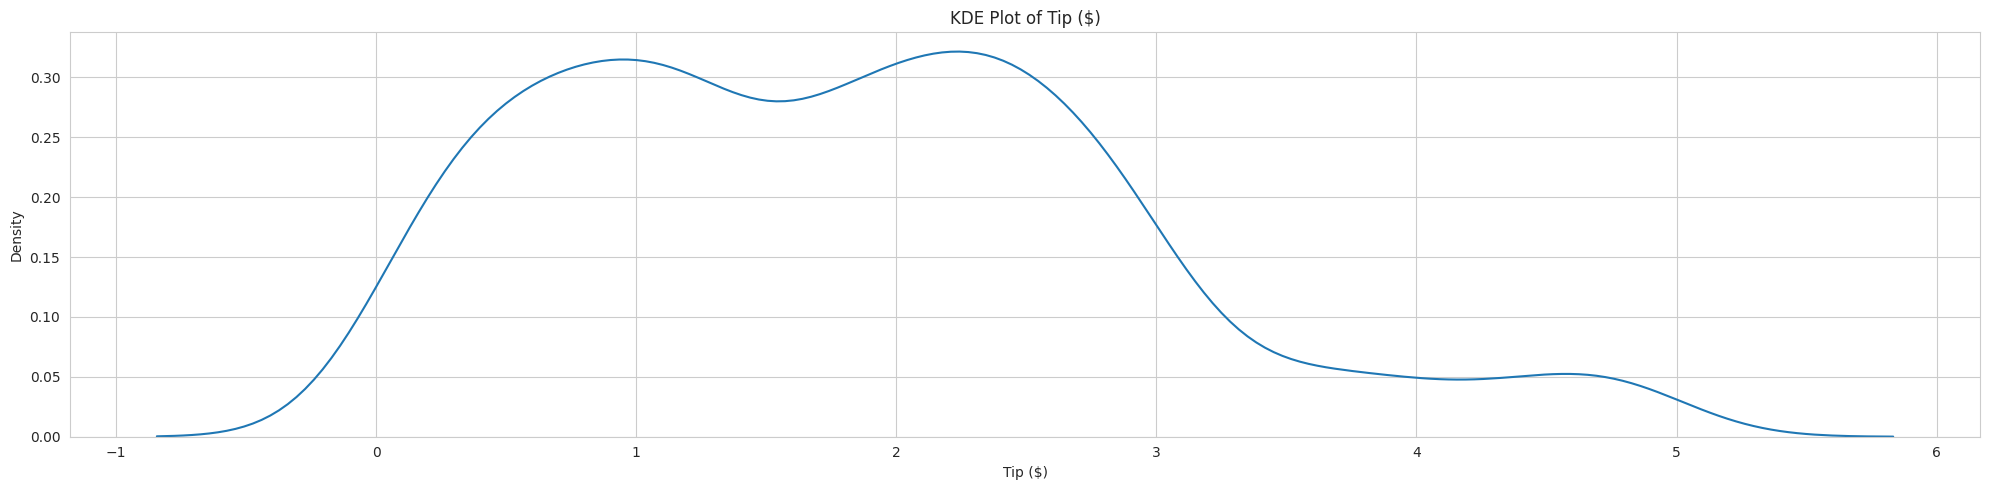

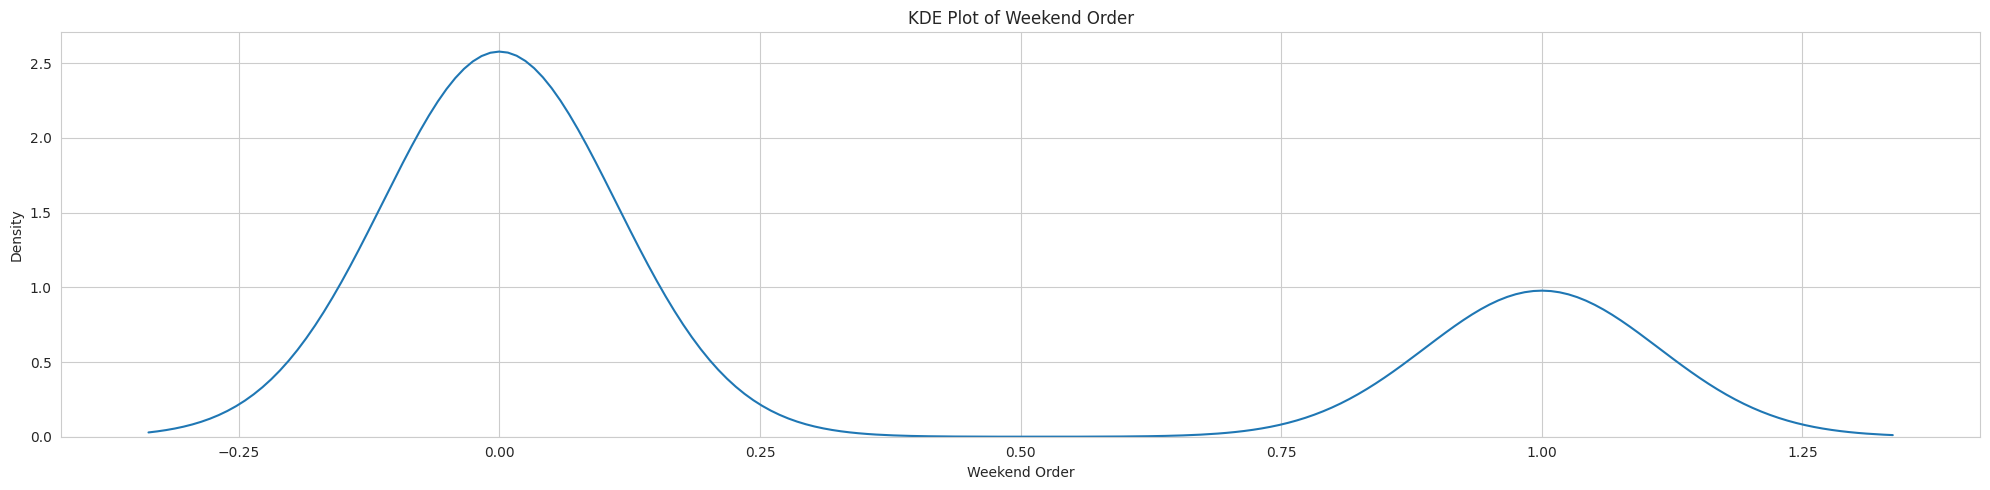

In [11]:
for features in cols:
    if features in df.columns and pd.api.types.is_numeric_dtype(df[features]):
        plt.figure(figsize=(20,5))
        sns.kdeplot(x=features, data=df)
        plt.title(f'KDE Plot of {features}')
        plt.xlabel(features)
        plt.ylabel('Density')
        plt.tight_layout()
        plt.show()

In [12]:
df.select_dtypes(include='object')

,Restaurant Name,Location,Order Time,Delivery Time,Taco Size,Taco Type
0,El Taco Loco,New York,01-08-2024 14:55,01-08-2024 15:36,Regular,Chicken Taco
1,El Taco Loco,San Antonio,23-11-2024 17:11,23-11-2024 17:25,Regular,Beef Taco
2,Taco Haven,Austin,21-11-2024 20:24,21-11-2024 21:02,Large,Pork Taco
3,Spicy Taco House,Dallas,21-09-2024 06:43,21-09-2024 07:28,Regular,Chicken Taco
4,Casa del Taco,San Antonio,24-07-2024 11:01,24-07-2024 11:16,Large,Pork Taco
...,...,...,...,...,...,...
995,La Vida Taco,Austin,27-05-2024 11:12,27-05-2024 12:11,Large,Veggie Taco
996,The Taco Stand,San Antonio,03-04-2025 20:51,03-04-2025 21:29,Regular,Fish Taco
997,Urban Tacos,Houston,23-01-2025 05:33,23-01-2025 06:41,Regular,Pork Taco
998,Taco Fiesta,San Antonio,05-09-2024 15:49,05-09-2024 16:38,Regular,Veggie Taco


# FEATURE ENGINEERING

In [13]:
lab_col = ['Restaurant Name', 	'Location','Taco Size', 	'Taco Type','Weekend Order']

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [16]:
for column in lab_col:
    df[column] = le.fit_transform(df[column])

In [17]:
df

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order
0,770487,1,5,01-08-2024 14:55,01-08-2024 15:36,41,1,1,5,3.01,9.25,2.22,0
1,671858,1,7,23-11-2024 17:11,23-11-2024 17:25,14,1,0,1,6.20,4.25,3.01,1
2,688508,6,0,21-11-2024 20:24,21-11-2024 21:02,38,0,3,2,20.33,7.00,0.02,0
3,944962,4,2,21-09-2024 06:43,21-09-2024 07:28,45,1,1,2,3.00,5.50,1.90,1
4,476417,0,7,24-07-2024 11:01,24-07-2024 11:16,15,0,3,0,24.34,4.50,1.14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,164891,3,0,27-05-2024 11:12,27-05-2024 12:11,59,0,4,2,20.04,7.00,2.80,0
996,232442,8,7,03-04-2025 20:51,03-04-2025 21:29,38,1,2,0,13.69,3.00,1.38,0
997,251729,9,3,23-01-2025 05:33,23-01-2025 06:41,68,1,3,2,4.07,5.50,2.00,0
998,940215,5,7,05-09-2024 15:49,05-09-2024 16:38,49,1,4,5,14.56,9.25,1.89,0


# ANN SECTION

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,f1_score,precision_score,recall_score,mean_absolute_error,mean_squared_error

In [19]:
X = df.drop(columns=['Order Time','Delivery Time','Weekend Order'])
y = df['Weekend Order']

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,test_size=0.2)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
import shap

2025-06-03 08:09:43.483760: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748938183.807928      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748938183.894355      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

2025-06-03 08:10:11.069227: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [24]:
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.1)

# y_pred = model.predict(X_test_scaled).flatten()
# y_pred_labels = (y_pred > 0.5).astype(int)

# # Predict and evaluate
# # y_pred = model.predict(X_test_scaled).flatten()
# print("f1 Score:", f1_score(y_test, y_pred))

y_pred = model.predict(X_test_scaled)
y_pred_labels = (y_pred > 0.5).astype(int).flatten()

print(classification_report(y_test, y_pred_labels))
# print("F1 Score:", f1_score(y_test, y_pred_labels))

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.2075 - mae: 0.3607 - val_loss: 0.2199 - val_mae: 0.3683
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1512 - mae: 0.3029 - val_loss: 0.2087 - val_mae: 0.3733
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1373 - mae: 0.2979 - val_loss: 0.2108 - val_mae: 0.3645
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1235 - mae: 0.2786 - val_loss: 0.2117 - val_mae: 0.3670
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1171 - mae: 0.2634 - val_loss: 0.2108 - val_mae: 0.3647
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1202 - mae: 0.2700 - val_loss: 0.2151 - val_mae: 0.3593
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1253 - mae: 0.2842 - val_loss: 0.2279 - val_mae: 0.3576
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1075 - mae: 0.2537 - val_loss: 0.2237 - val_mae: 0.3612
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1026 - mae:

# CONCLUSION:

> RECALL VALUE COMMING FOR THE CLASS1 IS BAD, DUE TO IMBALANCE IN THE TARGET VALUE, MAY BE THIS CAN BE BATTER AFTER BALANCNG THE TARGET.
>
> OVERALL MODEL PREDICTION ARE GOOD